In [2]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The data used in this project was obtained from an online health data store and the link to the data source has been provided.[Click here to access the data source.](https://figshare.com/articles/dataset/The_Health_Gym_v2_0_Synthetic_Antiretroviral_Therapy_ART_for_HIV_Dataset/22827878)

In [3]:
# Reading in the data
df = pd.read_csv("HealthGymART4HIV.csv")
df.head()

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),PatientID,Timestep
0,29.944271,793.45830,30.834505,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,0
1,29.241980,467.41890,30.355980,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,1
2,28.748991,465.12485,30.405320,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,2
3,28.101835,692.00690,30.248816,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,3
4,28.813837,641.75714,29.944712,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,4


In [3]:
# Obtaining a general information about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534960 entries, 0 to 534959
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VL               534960 non-null  float64
 1   CD4              534960 non-null  float64
 2   Rel CD4          534960 non-null  float64
 3   Gender           534960 non-null  float64
 4   Ethnic           534960 non-null  float64
 5   Base Drug Combo  534960 non-null  float64
 6   Comp. INI        534960 non-null  float64
 7   Comp. NNRTI      534960 non-null  float64
 8   Extra PI         534960 non-null  float64
 9   Extra pk-En      534960 non-null  float64
 10  VL (M)           534960 non-null  float64
 11  CD4 (M)          534960 non-null  float64
 12  Drug (M)         534960 non-null  float64
 13  PatientID        534960 non-null  int64  
 14  Timestep         534960 non-null  int64  
dtypes: float64(13), int64(2)
memory usage: 61.2 MB


In [4]:
# Getting the shape of our dataframe
rows, columns = df.shape
print(f"The dataframe has {rows} rows and {columns} columns")

The dataframe has 534960 rows and 15 columns


#### Additional External Information about the data
The dataset is composed of 534,960 records, distributed over 15 distinct columns, and is preserved in a CSV format with a size of 61.2 MB. It contains information about 8,916 synthetic patients over a period of 60 months, with data summarised on a monthly basis. The total number of records corresponds to the product of the synthetic patient count and the record duration in months, thus equating to 8,916 multiplied by 60.

The dataset's structure encompasses 15 columns, which include 13 variables pertinent to ART for HIV, a unique patient identifier, and a further variable signifying the specific time point.


In [5]:
# Checking for missing values in the dataframe and their corresponding proportions.
missing_values = pd.DataFrame({"Missing count":df.isnull().sum(), "Proportion":df.isnull().sum()/len(df)})
missing_values

,Missing count,Proportion
VL,0,0.0
CD4,0,0.0
Rel CD4,0,0.0
Gender,0,0.0
Ethnic,0,0.0
Base Drug Combo,0,0.0
Comp. INI,0,0.0
Comp. NNRTI,0,0.0
Extra PI,0,0.0
Extra pk-En,0,0.0


Clearly the dataframe has no missing values.
#### Column Names
The column names in the dataframe are: 'VL', 'CD4', 'Rel CD4', 'Gender', 'Ethnic', 'Base Drug Combo','Comp. INI', 'Comp. NNRTI', 'Extra PI', 'Extra pk-En', 'VL (M)','CD4 (M)', 'Drug (M)', 'PatientID', 'Timestep'

### Column Information
13 of the columns contain float64 datatype while 2 of the columns actually contain int64 data type. Each column has a specific name as specified above.

The meaning of each of the the columns in the dataframe is as outlined below:
VL: Viral Load - It represents the amount of HIV RNA (genetic material of the virus) present in a blood sample. Viral load is an important measure of HIV infection and is used to monitor the effectiveness of antiretroviral therapy (ART).

CD4: CD4 Cell Count - CD4 cells, also known as T-helper cells, are a type of white blood cell that plays a crucial role in the immune system. The CD4 cell count indicates the number of CD4 cells per cubic millimeter of blood. It is used to assess the immune function and health status of HIV-positive individuals.

Rel CD4: Relative CD4 Cell Count - This is the CD4 cell count relative to a reference value. It may represent the percentage change in CD4 count from a baseline or previous measurement.

Gender: Gender of the patient - It indicates the biological sex of the individual (e.g., Male, Female).

Ethnic: Ethnicity of the patient - It represents the racial or ethnic background of the individual.

Base Drug Combo: Base Drug Combination - It refers to the initial combination of antiretroviral drugs prescribed to the patient for HIV treatment.

Comp. INI: Completion of Initial Antiretroviral Therapy (ART) - It indicates whether the patient has completed the initial course of ART.

Comp. NNRTI: Completion of Non-Nucleoside Reverse Transcriptase Inhibitor (NNRTI) - It indicates whether the patient has completed the course of NNRTI drugs, which are a class of antiretroviral medications.

Extra PI: Extra Protease Inhibitor (PI) - It may indicate whether additional protease inhibitor drugs are prescribed as part of the treatment regimen.

Extra pk-En: Extra Peak Enhancer - It may refer to additional medications or supplements aimed at enhancing the effectiveness of antiretroviral therapy.

VL (M): Viral Load Measurement - This column may contain monthly viral load measurements, such as the method used for measurement or the units of measurement.

CD4 (M): CD4 Measurement - Similar to 'VL (M)', this column may contain monthly CD4 cell count measurements.

Drug (M): Drug (monthly) - It may contain monthly information about the antiretroviral drugs prescribed, such as dosage, formulation, or brand name.

PatientID: Patient Identifier - It uniquely identifies each patient in the dataset.

Timestep: Time Step - It represents the time interval at which the measurements were taken or recorded. It could be in days, weeks, months, or other units depending on the study design.


#### Data type
The entire dataframe is stored as pandas dataframe.

Statistical summary of the data

In [6]:
# Getting the statistical summary of the relevant columns
statistical_info = df.describe()
statistical_info[['VL','Rel CD4','CD4']]

,VL,Rel CD4,CD4
count,534960.000000,534960.000000,534960.000000
mean,7041.119417,36.352855,823.080891
std,18240.801089,30.404427,1250.245010
min,0.101498,1.871511,7.962432
25%,10.490656,17.461661,272.852865
50%,38.783188,27.733725,466.403180
75%,778.271910,44.152004,859.435142
max,97566.414000,586.634600,42475.200000


From the summary above we see that the minimum CD4 count is 7.962432 while the maximum count is 42475.200. For the relative CD4 count, the minimum count is 1.871510 while the maximum count is 	586.634600. Therefore, generally for any patient according to this data, the CD4 count and the relative CD4 count should be within the given range of values.

#### Analyzing Correlation Among Features
Now we wish to explore about the correlation among the different features in our dataset.However we will only focus on the features which are only relevant to our problem statement. For instance we won't consider features like PatientID since it is just used as a unique identifier of a patient and thus it has no contribution or statistical implication on the data itself.

In [5]:
# Calculating the correlation values

#selecting features to be ignored in calculating the correlation
features_to_drop = ['VL (M)',	'CD4 (M)',	'PatientID',	'Timestep']
df.drop(features_to_drop, axis = 1).corr()

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,Drug (M)
VL,1.000000,-0.068740,-0.202253,0.018092,0.146357,-0.063742,-0.107539,0.023422,0.105259,0.034470,-0.643081
CD4,-0.068740,1.000000,0.687175,-0.016742,0.120202,-0.157940,0.023897,-0.029153,0.095816,0.092509,0.108628
Rel CD4,-0.202253,0.687175,1.000000,0.109401,-0.042737,-0.130791,0.049987,-0.054252,0.052426,0.041306,0.204603
Gender,0.018092,-0.016742,0.109401,1.000000,-0.336720,0.226950,0.100416,0.185294,-0.260885,0.016818,0.029582
Ethnic,0.146357,0.120202,-0.042737,-0.336720,1.000000,-0.286224,0.019824,-0.213380,0.286037,0.022836,-0.179115
Base Drug Combo,-0.063742,-0.157940,-0.130791,0.226950,-0.286224,1.000000,0.116286,0.434053,-0.570518,-0.011369,0.040525
Comp. INI,-0.107539,0.023897,0.049987,0.100416,0.019824,0.116286,1.000000,-0.430736,-0.302629,-0.009707,0.069127
Comp. NNRTI,0.023422,-0.029153,-0.054252,0.185294,-0.213380,0.434053,-0.430736,1.000000,-0.366331,0.188852,-0.065321
Extra PI,0.105259,0.095816,0.052426,-0.260885,0.286037,-0.570518,-0.302629,-0.366331,1.000000,0.036078,-0.091943
Extra pk-En,0.034470,0.092509,0.041306,0.016818,0.022836,-0.011369,-0.009707,0.188852,0.036078,1.000000,0.011170


From the correlation coefficients above, we notice that:

The viral load (VL) is moderately correlated to the monthly drug administered (-0.643081) which indicates a moderate negative correlation of viral load to the monthly drug , a low negative correlation with the Completion of initial ART (Comp. INI) - (-0.107539), a low positive correlation with the completion of NNTRI (0.023422).

The completion of initial ART on the other hand shows a weak positive correlation with base drug cmbination and drug metadata. It also shows a weak negative correlation with Comp. NNRTI, implying that a patient who has completed the initial ART is not likely to complete the NNRTI dosage.


## EXPLORATORY DATA  ANALYSIS

C:\Users\Amell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'HISTOGRAM OF CD4 COUNT')

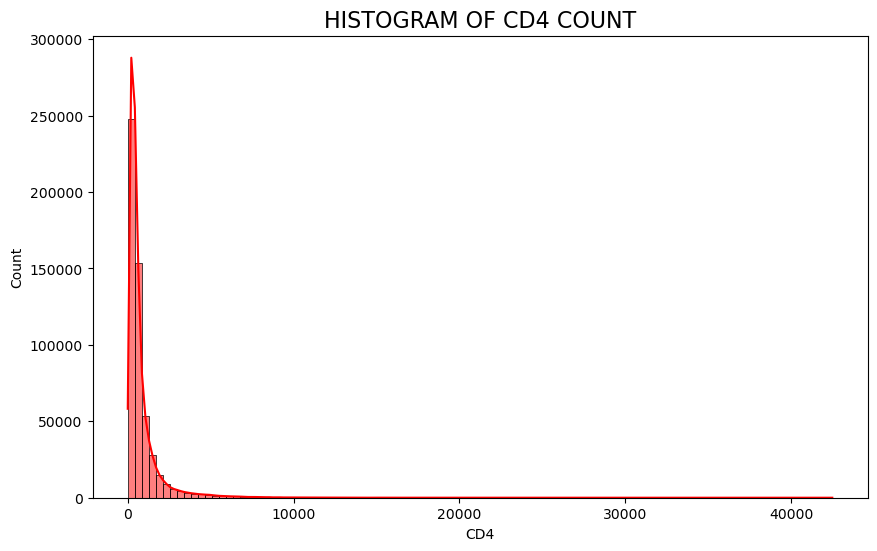

In [7]:
# Exploring the distribution of CD4
plt.figure(figsize=(10,6))
sns.histplot(data = df['CD4'], color = 'red',bins=100, kde='TRUE')
plt.title("HISTOGRAM OF CD4 COUNT", fontsize=16)


Text(0.5, 1.0, 'HISTOGRAM OF CD4 COUNT')

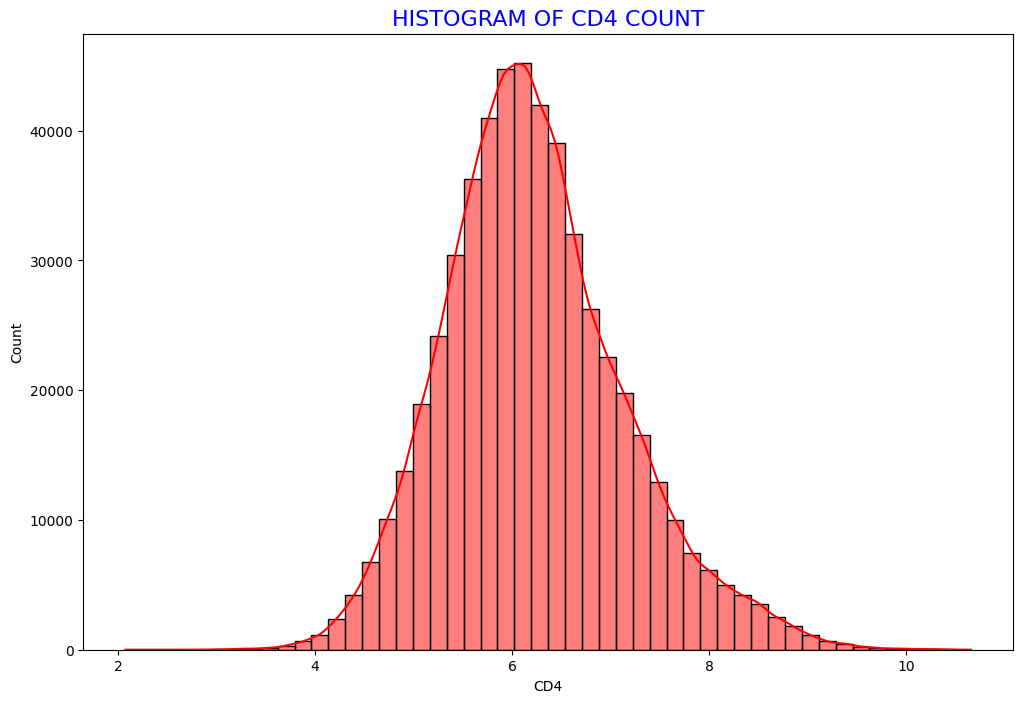

In [6]:
# Exploring the distribution of CD4
plt.figure(figsize=(12,8))
sns.histplot(data = np.log(df['CD4']), color = 'red',bins=50, kde='TRUE', edgecolor = 'black')
plt.title("HISTOGRAM OF CD4 COUNT", fontsize=16, color = 'blue')


##### Histogram of CD4 Count
The histogram gives a good insight about the general distribution of the CD4 count within the dataset.
From the histogram we can realize that the CD4 count data is skewed to the left implying that most of the patients CD4 counts is less than the mean CD4 count. 
This suggests that most of the individuals in the dataset have a lower CD4 count.

C:\Users\Amell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Viral Load')

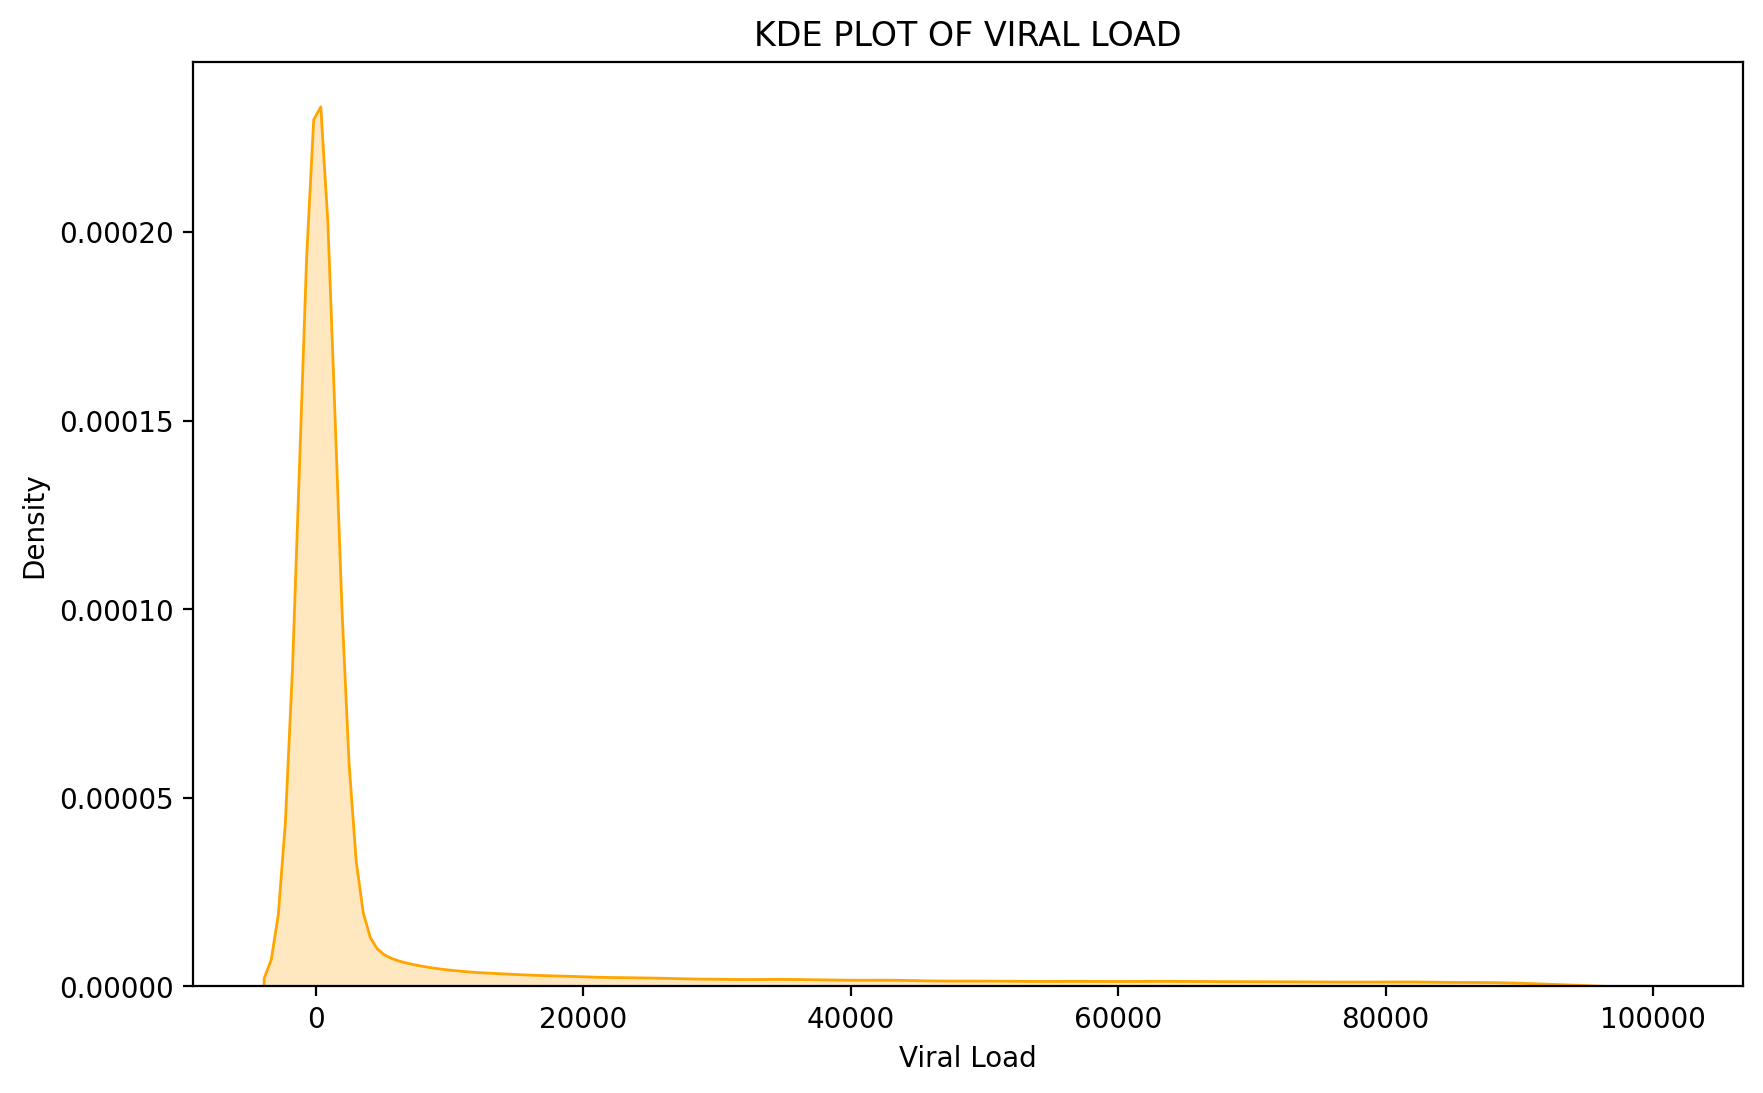

In [8]:
# Now we explore the distribution of the Viral load.
plt.figure(figsize=(10,6), dpi = 200)

sns.kdeplot(data = df["VL"] , color = 'orange', fill='TRUE')
plt.title("KDE PLOT OF VIRAL LOAD")
plt.xlabel('Viral Load')

Text(0.5, 0, 'Log of Viral Load')

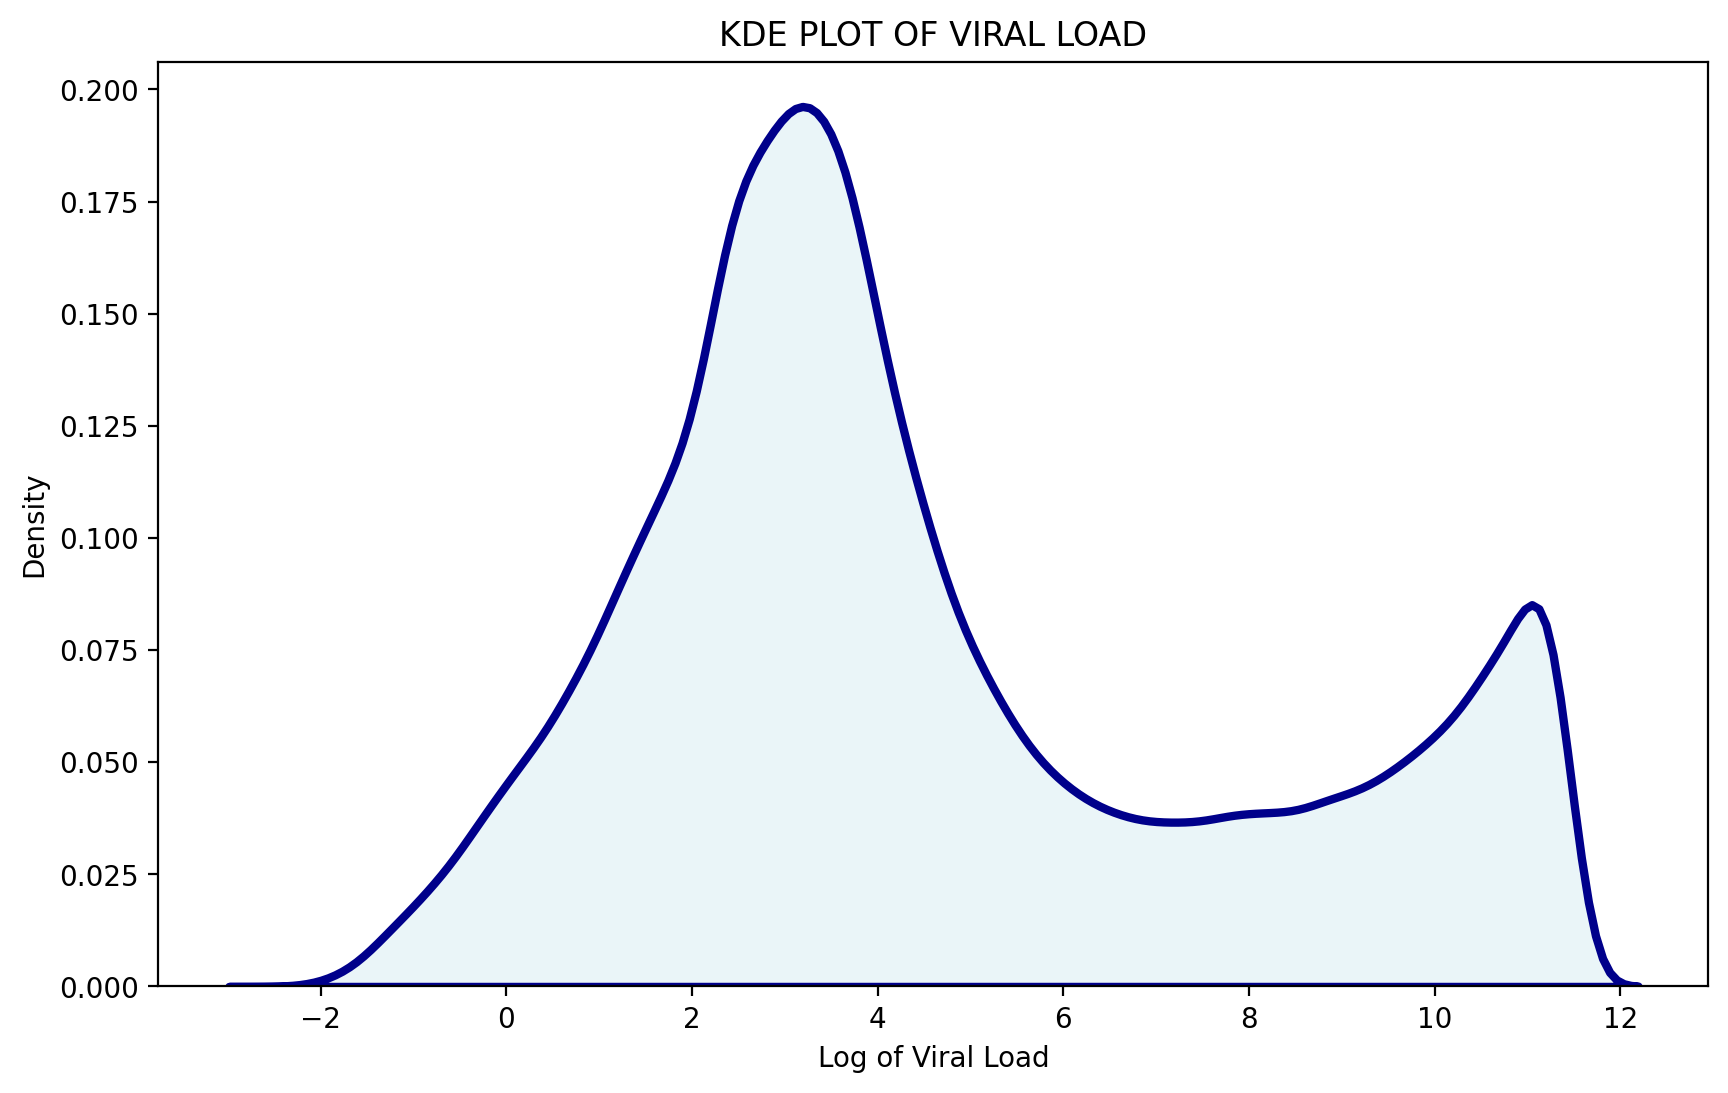

In [9]:
# A log transformation might be suitable to transform the data for proper insights

plt.figure(figsize=(10,6), dpi = 200)

sns.kdeplot(data = np.log(df["VL"]) , edgecolor = "darkblue", color='lightblue',linewidth=3, fill=True)
plt.title("KDE PLOT OF VIRAL LOAD")
plt.xlabel('Log of Viral Load')

##### KDE Plot of Viral Load
KDE plot of viral load is skewed to the left, suggesting that the distribution of viral load values is skewed towards lower values. This indicates that a larger proportion of the data has lower viral load values compared to higher values.
Therefore, majority of individuals in the dataset have lower viral load values.


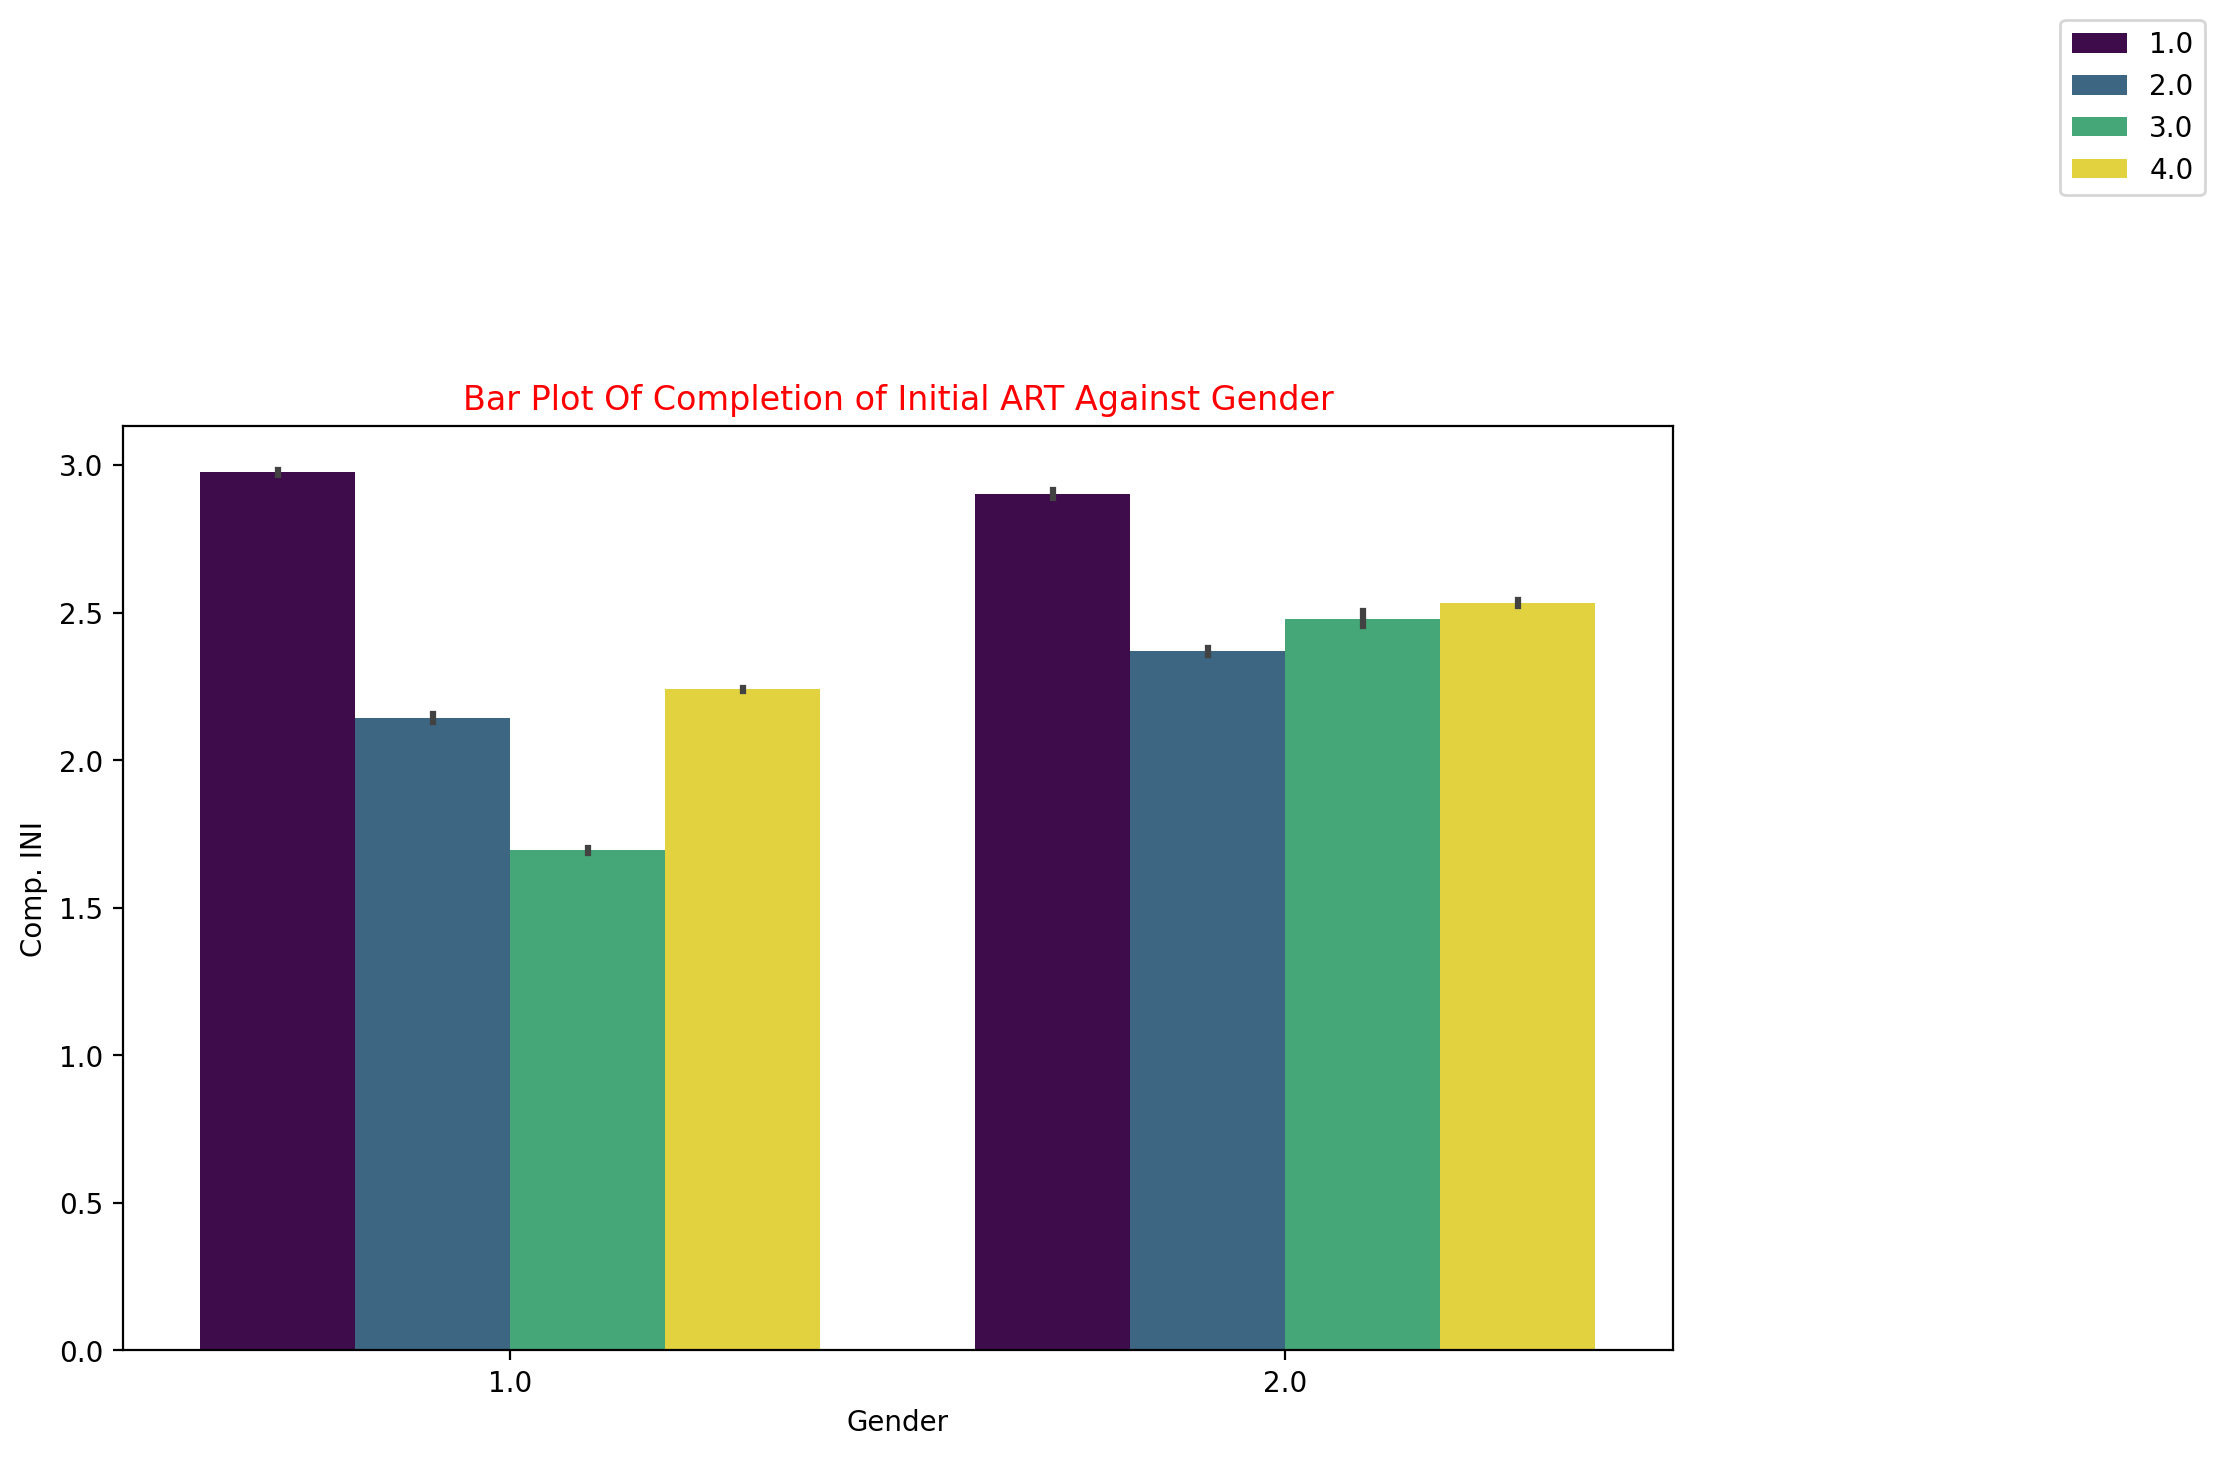

In [10]:
# We want to explore the level of completion of the initial ART based on the gender of the patient and group them according to the ethnic groups that thay come from.

fig, ax = plt.subplots(figsize= (10,6), dpi = 200)

sns.barplot(y= df['Comp. INI'], x=df['Gender'], data=df, hue = 'Ethnic', palette = 'viridis')
ax.set_title('Bar Plot Of Completion of Initial ART Against Gender', color='red')
ax.legend(loc = (1.25,1.25))

##### Bar Plot Of Completion of Initial ART Against Gender
The bar plot helps us derive insights about the initial competion of ART among female and male patients.
From the bar plot we see that the number of female patients who completed the inital ART course is lower compared to that of men which consequently means that male patients are committed to complete their ART course far more than the female patients.

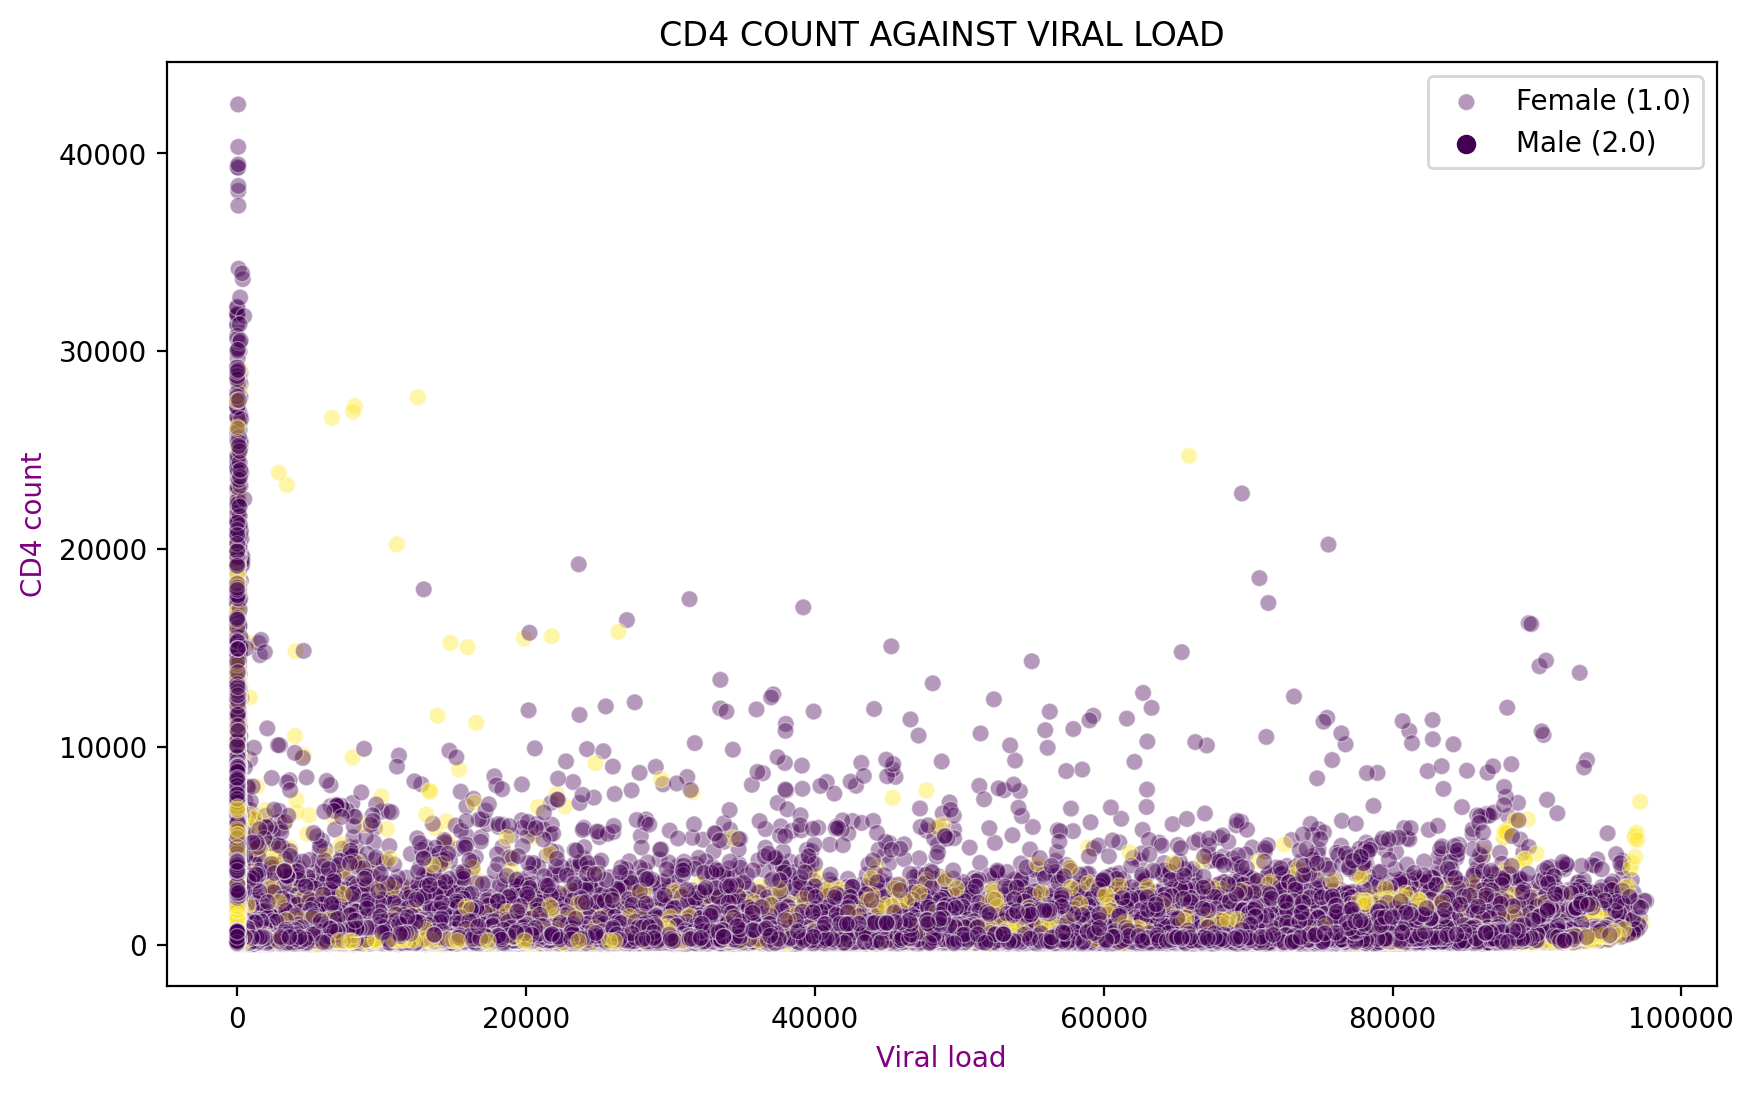

In [10]:
#We need to assess the relationship between the viral load and the CD4 count
plt.figure(figsize=(10,6), dpi = 200)
sns.scatterplot(data = df, x= df['VL'], y=df['CD4'], color='red', hue = "Gender", palette='viridis', alpha = 0.4)
plt.xlabel("Viral load", color = 'purple')
plt.ylabel("CD4 count", color = 'purple')
plt.title("CD4 COUNT AGAINST VIRAL LOAD")
plt.legend(['Female (1.0)', 'Male (2.0)'])
plt.show();

##### Scatter Plot of CD4 Count Vs Viral Load
The scatter plot helps us to gain the insight about the prevalence of HIV based on their gender as well as the relationship of the CD4 count with the viral load.
From the scatter plot, we can see that the level of prevalence among female patients is higher compared to that in men.

Moreover, it shows that for lower viral load values the CD4 count tends to be very high, but for higher viral load values the CD4 count values tend to be generally lower.


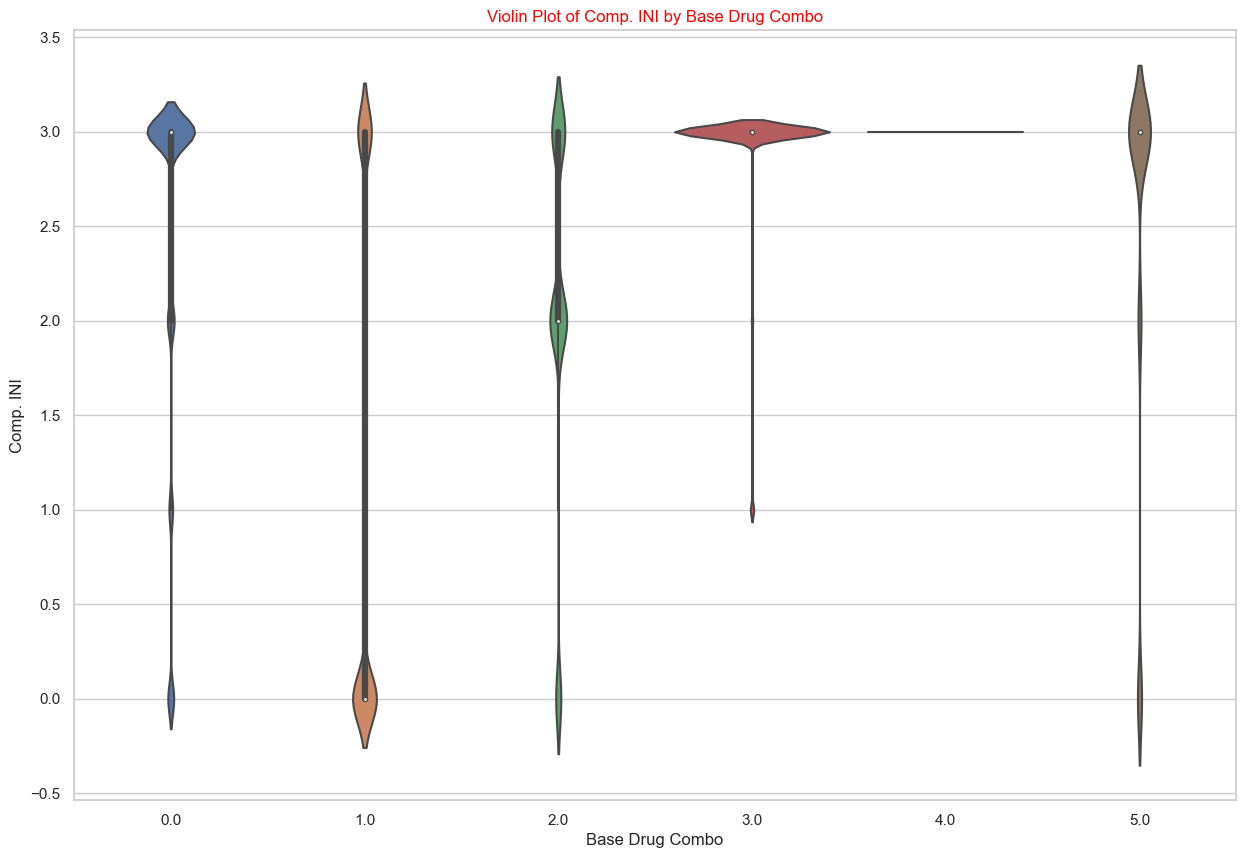

In [80]:
# We assess the relationship between the drug combination and the completion of the initial ART course

#Creating a violin plot
sns.set(style="whitegrid")

# Set figure size
plt.figure(figsize=(15, 10))
sns.violinplot(x="Base Drug Combo", y="Comp. INI", data=df)

# Set labels and title
plt.xlabel("Base Drug Combo")
plt.ylabel("Comp. INI")
plt.title("Violin Plot of Comp. INI by Base Drug Combo", color ='red')

# Show plot
plt.show()

##### Violin Plot of Comp. INI against Base Drug Combo
The violin plot is to help us derive useful insights about the possibility of a patient completing the initial ART course based on the type of base drug combination that they take.

From the violin plot above we can see that the drug combination 3 has a high percentage of patients finishing the initial ART course, followed by combination 0 and finally combination 5. 

The base drug combination 1 has a high percentage of patients failing to finish their initial ART course.

### Data Aggregation


In [11]:
# Since the data monitors a single patient over a period of 60 months, we group it in terms of patients in order to view the overall information for each patient.
monthly_patient_data = df.groupby('PatientID').mean()
monthly_patient_data

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),Timestep
PatientID,,,,,,,,,,,,,,
0,25.276324,507.019697,30.800317,1.0,3.0,0.000000,0.00,3.000000,5.000000,0.00,0.000000,0.050000,1.000000,29.5
1,3949.674172,515.219038,34.572840,1.0,4.0,0.000000,3.00,2.000000,5.000000,0.00,0.166667,0.166667,0.416667,29.5
2,41186.692879,1135.975796,67.224177,1.0,3.0,2.650000,3.00,3.000000,0.650000,0.35,0.133333,0.200000,0.383333,29.5
3,1677.770868,300.682719,22.543924,1.0,4.0,0.000000,2.95,2.016667,5.000000,0.00,0.116667,0.116667,0.566667,29.5
4,30021.051078,1094.334008,30.453966,1.0,4.0,0.000000,3.00,2.000000,5.000000,0.00,0.033333,0.133333,0.550000,29.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8911,47486.031073,729.889115,25.496084,1.0,4.0,0.000000,2.00,3.000000,5.000000,1.00,0.083333,0.166667,0.266667,29.5
8912,102.628917,293.512211,14.976054,1.0,4.0,3.000000,3.00,3.000000,1.250000,0.00,0.166667,0.116667,1.000000,29.5
8913,2550.037953,1770.064322,59.608453,2.0,4.0,0.000000,3.00,2.000000,5.000000,0.00,0.116667,0.083333,0.866667,29.5


The dataframe above shows the average monthly data for each patient monitored over a period of 60 months. This helps us derive more insights based on an individual patient across the entire period.

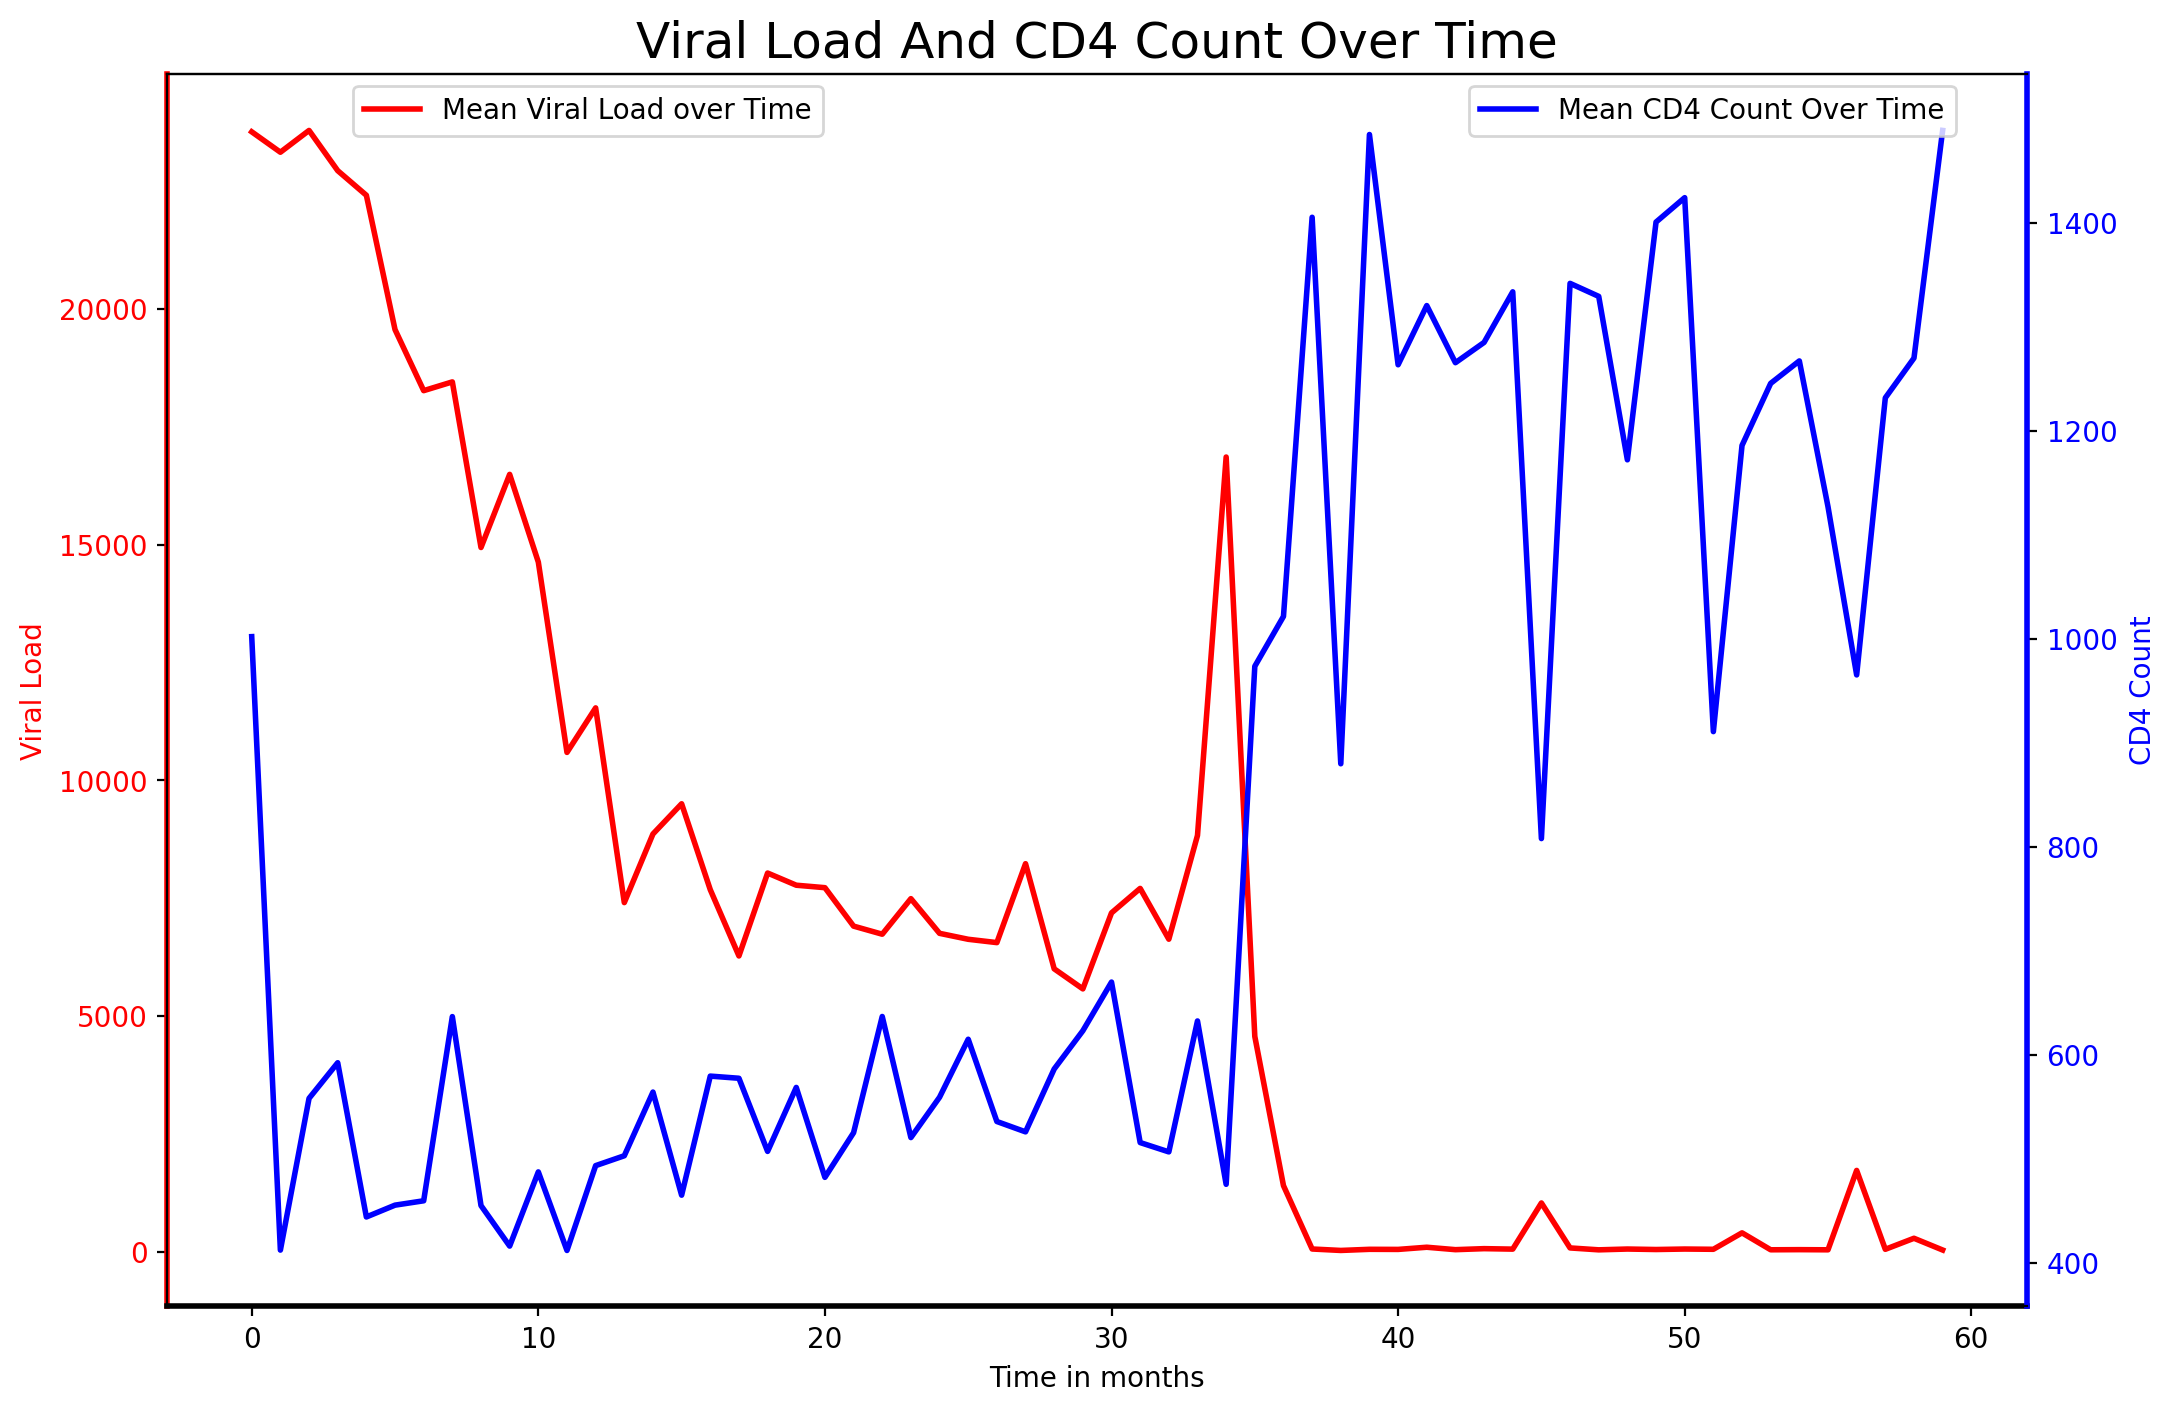

In [12]:
# Aggregating the data based on the timestep to assess disease progression over time
timestep_data = df.groupby('Timestep').mean()
x = timestep_data.index
viral_load = timestep_data['VL']
CD4 = timestep_data['CD4']

fig, ax = plt.subplots(dpi = 200, figsize = (12,8))


# Actual plotting
ax.plot(x,viral_load, color='red', label="Mean Viral Load over Time", lw=2)
ax.set_title("Viral Load And CD4 Count Over Time", fontsize = 18)
ax.set_ylabel('Viral Load', color = 'red')
ax.set_xlabel('Time in months')

ax.spines['left'].set_color('red')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['bottom'].set_color('black')

for label in ax.get_yticklabels():
    label.set_color('red')

ax.legend(loc=(0.1,0.95))


ax1 = ax.twinx()
ax1.plot(x, CD4, color='blue', label='Mean CD4 Count Over Time', lw=2)
ax1.set_ylabel("CD4 Count",color = 'blue')

ax1.spines['right'].set_color('blue')
ax1.spines['right'].set_linewidth(2)

for label in ax1.get_yticklabels():
    label.set_color('blue')

ax1.legend(loc=(0.7,0.95))





##### Line Plot of Viral Load and CD4 Count over Time
The plot shows clearly that over time, as the patient continues to take the medications, the viral load gradually decreases while the CD4 count increases.
This means that the medications are of great importance to the patient as they help improve the patient's health status during the period of 60 months that the patient was under observation.

<font color='#FF5733' size="10">

## MODELLING

</font>
nt>
nt>
nt>


#### DATA PRE-PROCESSING

In [14]:
# Check the DataFrame to confirm that the columns have been dropped
df.head()

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),PatientID,Timestep
0,29.944271,793.45830,30.834505,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,0
1,29.241980,467.41890,30.355980,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,1
2,28.748991,465.12485,30.405320,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,2
3,28.101835,692.00690,30.248816,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,3
4,28.813837,641.75714,29.944712,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,4


FEATURE ENGINEERING

In [15]:
# Determine the criteria for discontinuation based on 'Comp. INI' and 'VL'
# if 'Comp. INI' is 0 and 'VL' is high, we might assume discontinuation

# Define a function to determine discontinuation based on criteria
def determine_discontinuation(row):
    if row['Comp. INI'] == 0 and row['VL'] > 400:  # Adjust threshold_value as needed
        return 1  # Discontinuation
    else:
        return 0  # No discontinuation

# Apply the function to create a new column 'Discontinuation_Likelihood'
df['Discontinuation_Likelihood'] = df.apply(determine_discontinuation, axis=1)

In [16]:
df['Discontinuation_Likelihood'].value_counts()

Discontinuation_Likelihood
0    499329
1     35631
Name: count, dtype: int64

The choice of variables, viral load (VL) and Completion of Initial Antiretroviral Therapy (Comp. INI), stems from their clinical significance in the context of predicting ART discontinuation. Viral load is a key indicator of HIV progression and treatment response. Elevated viral load often indicates poor adherence to ART, which could lead to treatment failure or discontinuation. On the other hand, Comp. INI reflects whether a patient has completed the initial course of ART, which is crucial for establishing treatment efficacy and long-term adherence. By leveraging these two variables, we capture both the disease progression status (VL) and the treatment adherence behavior (Comp. INI), providing a comprehensive assessment of a patient's likelihood of discontinuing ART.

Regarding the choice of the threshold, setting it at 400 instances aims to strike a balance between sensitivity to discontinuation patterns and avoiding overfitting. The threshold represents a trade-off between capturing enough instances of ART discontinuation to train a predictive model effectively while ensuring that the model remains generalizable to unseen data. Choosing a higher threshold may lead to a more conservative model that overlooks subtle discontinuation patterns, while a lower threshold could introduce noise and overfitting. Therefore, selecting 400 instances as the threshold allows us to achieve a reasonable compromise, optimizing the model's performance for predicting ART discontinuation while maintaining its robustness and generalizability in clinical settings.

FEATURE SELECTION

Before proceeding to model training, it's crucial to perform feature selection to identify the most relevant predictors for ART discontinuation. This helps reduce dimensionality, mitigate overfitting, and enhance model interpretability

In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define your predictor variables (X) and target variable (y)
X = df.drop(columns=['Discontinuation_Likelihood'])  # Remove the target variable
y = df['Discontinuation_Likelihood']

In [18]:
X

,VL,CD4,Rel CD4,Gender,Ethnic,Base Drug Combo,Comp. INI,Comp. NNRTI,Extra PI,Extra pk-En,VL (M),CD4 (M),Drug (M),PatientID,Timestep
0,29.944271,793.45830,30.834505,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,1.0,1.0,0,0
1,29.241980,467.41890,30.355980,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,1
2,28.748991,465.12485,30.405320,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,2
3,28.101835,692.00690,30.248816,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,3
4,28.813837,641.75714,29.944712,1.0,3.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534955,8.633752,4061.17580,38.708908,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,55
534956,112.354550,2626.29880,22.839344,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,56
534957,9.187279,3726.58370,37.175346,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,57
534958,18.690529,2740.06540,29.395905,1.0,4.0,0.0,2.0,3.0,5.0,1.0,0.0,0.0,1.0,8915,58


In [19]:
# Instantiate a RandomForestClassifier
rf_classifier = RandomForestClassifier()

In [20]:
# Instantiate RFE with the classifier and the number of desired features
num_features_to_select = 5  # Adjust this number as needed
rfe = RFE(estimator=rf_classifier, n_features_to_select=num_features_to_select)

In [21]:
# Fit RFE to the entire dataset
rfe.fit(X, y)

# Get selected feature indices
selected_feature_indices = rfe.support_

In [22]:
# Get the selected feature names
selected_features = X.columns[selected_feature_indices]

# Keep only the selected features in the DataFrame
df_selected_features = df[selected_features]

DATA SPLITTING 

In [23]:
# Selecting relevant features
selected_features = ['VL', 'Rel CD4', 'Base Drug Combo', 'Comp. INI', 'Drug (M)']

# Extracting features (X) and target variable (y)
X = df[selected_features]
y = df['Discontinuation_Likelihood']

In [24]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Displaying the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape, "y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape, "y shape:", y_test.shape)

Training set - X shape: (427968, 5) y shape: (427968,)
Testing set - X shape: (106992, 5) y shape: (106992,)


### RANDOM FOREST 

In [26]:
# Step 1: Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [27]:
# Step 2: Instantiate the classifier
r_classifier = RandomForestClassifier()

In [28]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
cv_scores = cross_val_score(r_classifier, X_train, y_train, cv=5)  # 5-fold cross-validation


In [29]:
# Print the cross-validation scores
"Cross-Validation Scores:", cv_scores,"Mean Accuracy:", cv_scores.mean()

('Cross-Validation Scores:',
 array([0.99998832, 0.99998832, 1.        , 1.        , 1.        ]),
 'Mean Accuracy:',
 0.9999953267752412)

In [30]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

def objective(trial):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    # Instantiate the model with the suggested hyperparameters
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42  # Ensure reproducibility
    )

    # Evaluate the model using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

    return score

# Define the study
study = optuna.create_study(direction='maximize')  # Maximize accuracy
study.optimize(objective, n_trials=100)

# Get the best hyperparameters
best_params = study.best_params


[I 2024-03-13 11:13:26,921] A new study created in memory with name: no-name-d6ea3461-ff59-4f62-9716-36f4bc1f4d5b
[I 2024-03-13 11:14:33,758] Trial 0 finished with value: 0.9999953267752412 and parameters: {'n_estimators': 58, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9999953267752412.
[I 2024-03-13 11:16:42,047] Trial 1 finished with value: 0.9999953267752412 and parameters: {'n_estimators': 131, 'max_depth': 17, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9999953267752412.
[I 2024-03-13 11:19:03,258] Trial 2 finished with value: 0.9999953267752412 and parameters: {'n_estimators': 147, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 0.9999953267752412.
[I 2024-03-13 11:21:05,343] Trial 3 finished with value: 0.9999953267752412 and parameters: {'n_estimators': 123, 'max_depth': 16, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 0 with value: 

KeyboardInterrupt: 

### XGBOOST

In [31]:
# Step 1: Import Libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [32]:
# Define additional parameters
params = {
    'n_estimators': 100,  # Number of trees (you can adjust this value)
    'max_depth': 6,  # Maximum tree depth
    'learning_rate': 0.1,  # Learning rate
    'gamma': 0,  # Regularization parameter for tree growth
    'subsample': 0.8,  # Subsample ratio of the training instance
    'colsample_bytree': 0.8,  # Subsample ratio of columns when constructing each tree
    # Add more parameters as needed
}


In [33]:
# Instantiate the XGBClassifier with additional parameters
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(**params)

In [34]:
# Step 3: Train the model
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
# Step 4: Predictions
y_pred = xgb_classifier.predict(X_test)

In [36]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [37]:
# Print the evaluation metrics
print("XGBoost Classifier Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

XGBoost Classifier Metrics:
Accuracy: 0.9999532675340213
Precision: 0.9993016759776536
Recall: 1.0
F1 Score: 0.9996507160321341
ROC AUC Score: 0.9999749591834691


#### DECISION TREE 

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10,15]
}

In [39]:
# Create the grid search with cross-validation
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, cv=5)

In [40]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10, 15]})

In [41]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [42]:
best_params

{'max_depth': 3, 'min_samples_split': 2}

In [43]:
# Instantiate a Decision Tree classifier with the best hyperparameters
dt_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [44]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [45]:
# Predict on the test data
y_pred = dt_classifier.predict(X_test)

In [46]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [47]:
print("Decision Tree Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Decision Tree Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


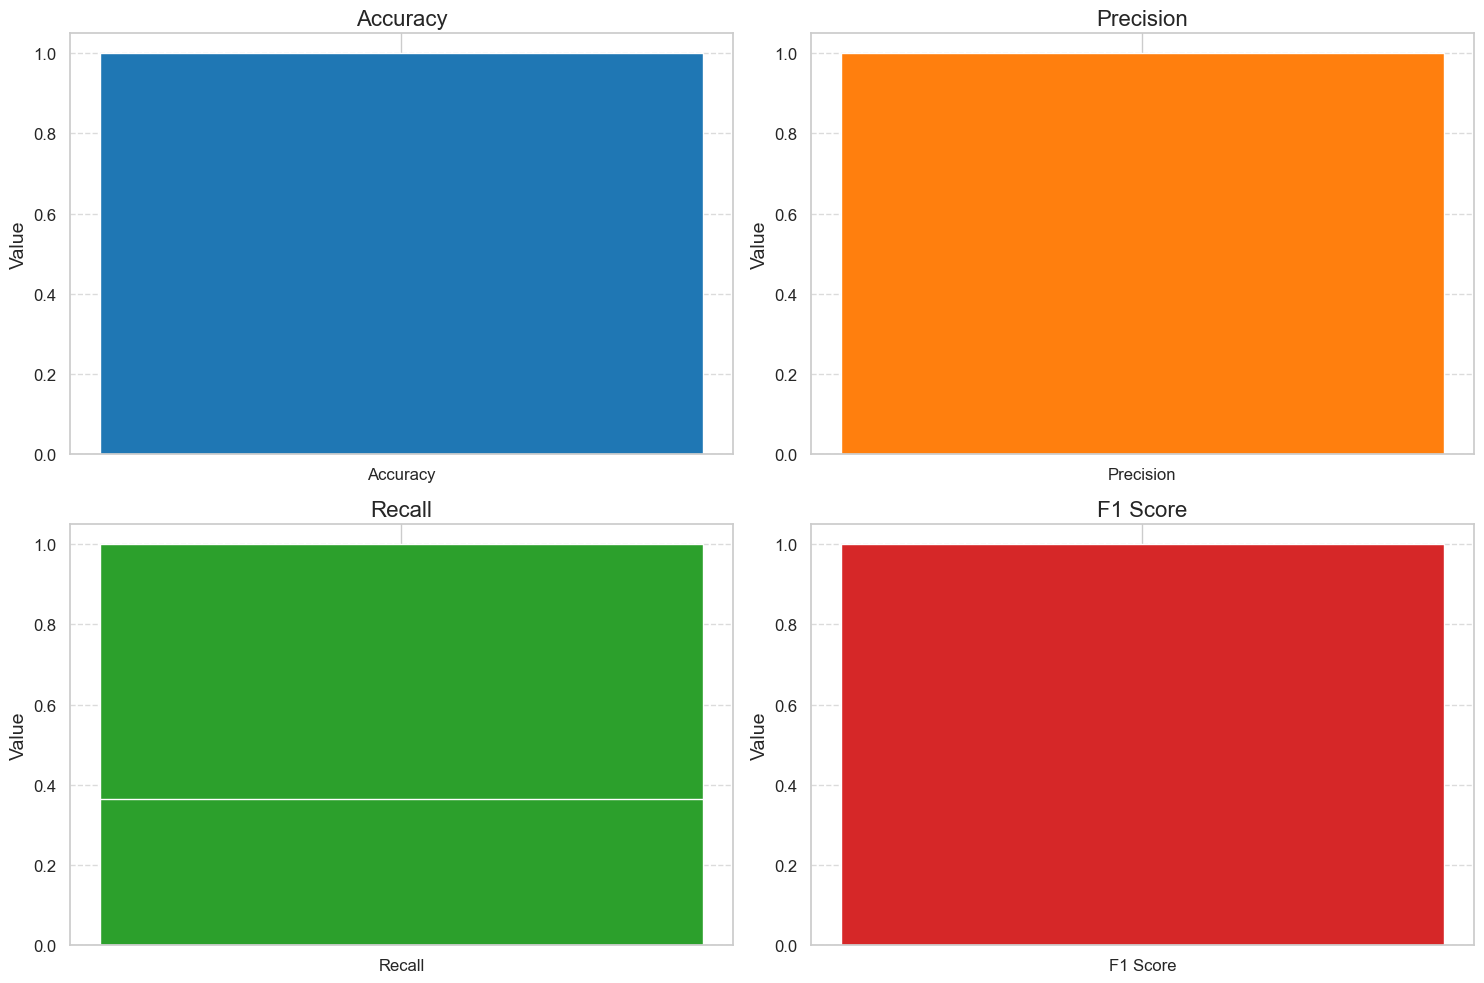

In [87]:
import matplotlib.pyplot as plt

# Set a custom color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set figure size
plt.figure(figsize=(15, 10))

# Plot accuracy
plt.subplot(2, 2, 1)
plt.bar("Accuracy", accuracy, color=colors[0])

# Set title and labels
plt.title("Accuracy", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot precision
plt.subplot(2, 2, 2)
plt.bar("Precision", precision, color=colors[1])

# Set title and labels
plt.title("Precision", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot recall
plt.subplot(2, 2, 3)
plt.bar("Recall", recall, color=colors[2])

# Set title and labels
plt.title("Recall", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Plot F1 score
plt.subplot(2, 2, 4)
plt.bar("F1 Score", f1, color=colors[3])

# Set title and labels
plt.title("F1 Score", fontsize=16)
plt.ylabel("Value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


### LOGISTIC REGRESSION

In [91]:
from sklearn.linear_model import LogisticRegression

# Step 1: Instantiate the model
log_reg_classifier = LogisticRegression()

In [92]:
# Step 2: Fit the model on the training data
log_reg_classifier.fit(X_train, y_train)

C:\Users\Amell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
# Step 3: Predict on the testing data
y_pred_log_reg = log_reg_classifier.predict(X_test)
y_pred_log_reg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [94]:
# Step 4: Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

In [96]:
# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_log_reg)
print("Precision:", precision_log_reg)
print("Recall:", recall_log_reg)
print("F1 Score:", f1_log_reg)

Logistic Regression Metrics:
Accuracy: 0.9837651413189771
Precision: 0.9729399441340782
Recall: 0.7788958770090846
F1 Score: 0.8651711557866957


In [104]:
from sklearn.metrics import confusion_matrix

# Predict target values
y_pred_log_reg =log_reg_classifier.predict(X_test)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[99682   155]
 [ 1582  5573]]


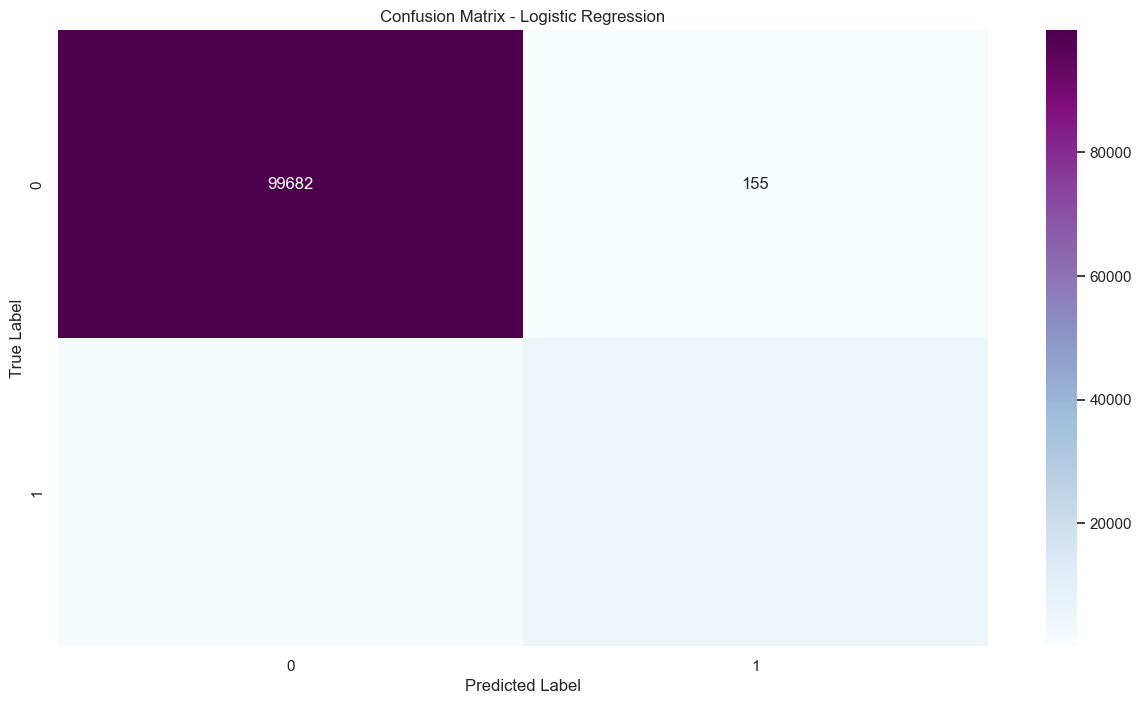

In [116]:
import seaborn as sns

# Plot confusion matrix with different color palette
plt.figure(figsize=(15, 8))
sns.heatmap(conf_matrix, annot=True, cmap='BuPu', fmt='d')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


The confusion matrix provides a breakdown of the model's predictions compared to the actual labels. In the context of the problem statement, the matrix is as follows:

True Negatives (TN): 99682
False Positives (FP): 155
False Negatives (FN): 1582
True Positives (TP): 5573
True Negatives (TN): The number of patients correctly classified as low-risk (no discontinuation) by the model.
False Positives (FP): The number of patients incorrectly classified as high or medium-risk (predicted discontinuation) by the model when they were actually low-risk.
False Negatives (FN): The number of patients incorrectly classified as low-risk (no discontinuation) by the model when they were actually high or medium-risk (actual discontinuation).
True Positives (TP): The number of patients correctly classified as high or medium-risk (predicted discontinuation) by the model.
Based on this interpretation, the model seems to have a relatively higher number of false negatives compared to false positives. This means that while it's effective at identifying patients at risk of discontinuing ART (high or medium-risk), it tends to miss some of these cases, potentially leading to inadequate intervention for those patients. Improving recall (decreasing false negatives) could be crucial to better identifying all patients at risk of discontinuation and providing appropriate interventions.

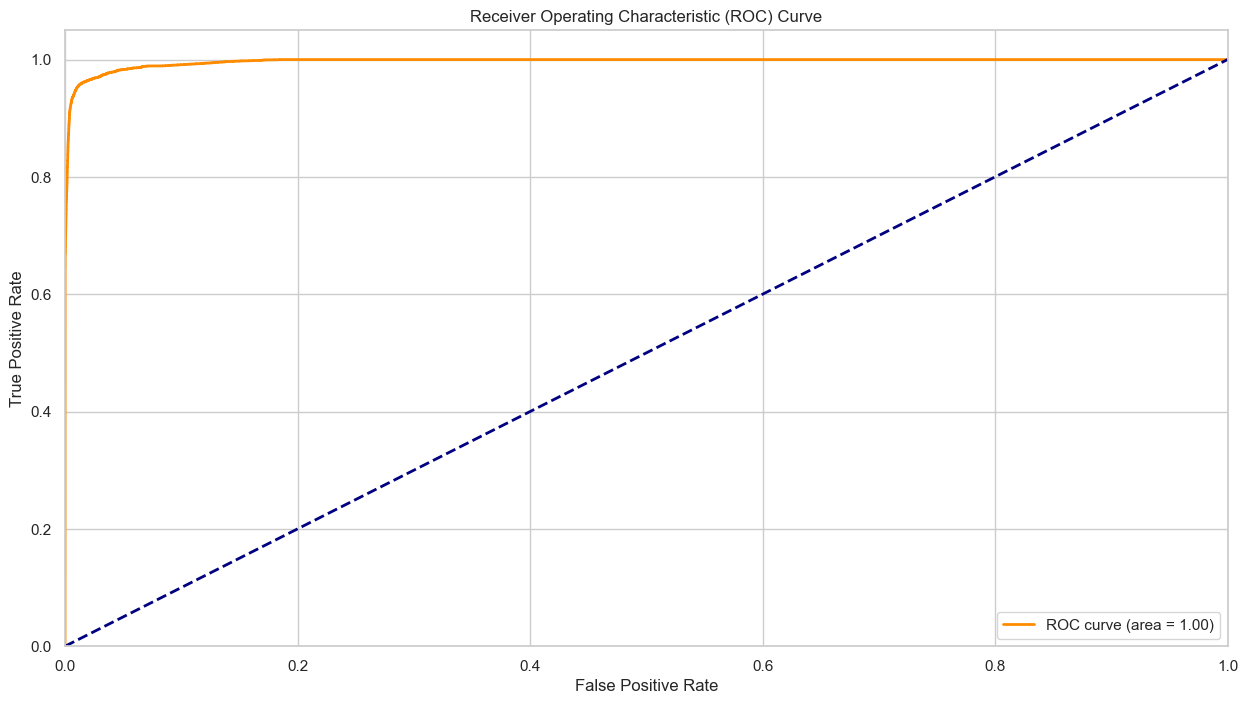

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 5: Get the predicted probabilities for the positive class
y_proba_log_reg = log_reg_classifier.predict_proba(X_test)[:, 1]

# Step 6: Compute ROC curve and AUC
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_proba_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

# Set figure size
plt.figure(figsize=(15, 8))
plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

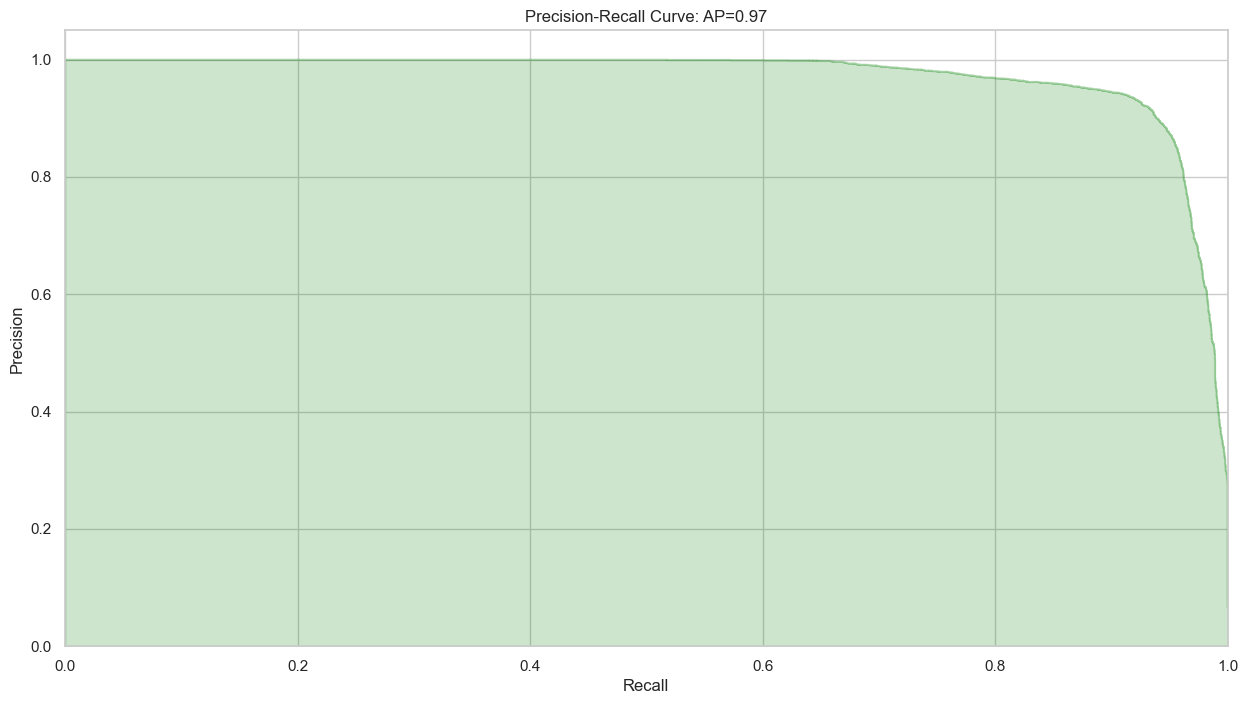

In [118]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Step 8: Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba_log_reg)
average_precision = average_precision_score(y_test, y_proba_log_reg)

# Set figure size
plt.figure(figsize=(15, 8))
plt.step(recall, precision, color='green', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()


In [99]:
from sklearn.metrics import confusion_matrix
# Step 10: Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

#### KNN-NEIGHBOURS

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Example: Use 5 neighbors

In [50]:
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [51]:
y_pred_knn = knn_classifier.predict(X_test)

In [52]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [55]:
accuracy_knn,precision_knn,recall_knn,f1_knn

(0.9407993120981007,
 0.5934866772944659,
 0.3642208245981831,
 0.4514117443270397)

Based on the results gotten, the KNN model achieved an accuracy of approximately 94.08%. However, its precision, recall, and F1 score are relatively lower, indicating potential issues with the model's performance in correctly identifying positive cases (discontinuation of ART). The precision of approximately 59.35% suggests that when the model predicts a patient will discontinue ART, it is correct around 59.35% of the time. The recall of approximately 36.42% indicates that the model captures only about 36.42% of actual discontinuations. The F1 score, which combines precision and recall, is approximately 45.14%. These metrics suggest that while the model's overall accuracy is relatively high, it may not perform well in accurately identifying discontinuations, particularly in terms of recall. 

Tune Hyperparameters

In [56]:
# Example of hyperparameter tuning using grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}
grid_search = GridSearchCV(knn_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


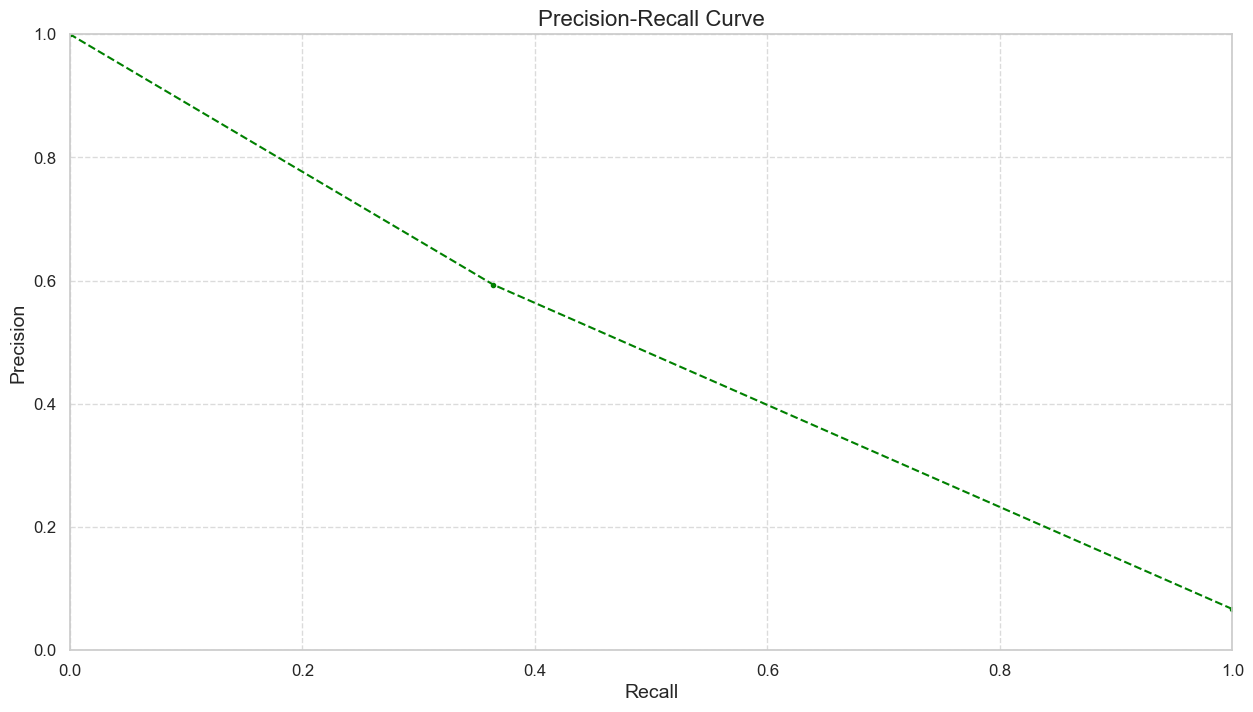

In [119]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_knn)

# Set figure size
plt.figure(figsize=(15, 8))

# Plot Precision-Recall curve with custom styling
plt.plot(recall, precision, marker='.', color='green', linestyle='--')

# Set labels and title
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# Set axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()


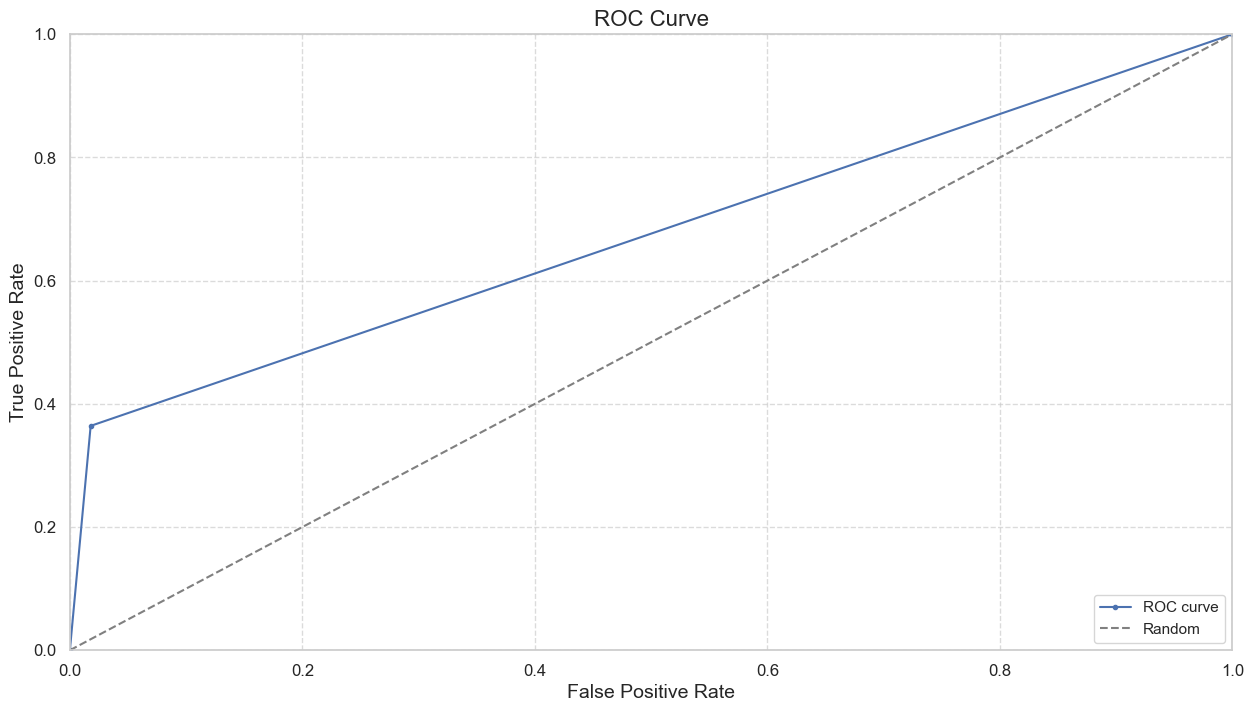

In [105]:
from sklearn.metrics import roc_curve

# Create ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)

# Set figure size
plt.figure(figsize=(15, 8))

# Plot ROC curve with custom styling
plt.plot(fpr, tpr, marker='.', color='b', linestyle='-')

# Add a diagonal dashed line for reference
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits
plt.xlim([0, 1])
plt.ylim([0, 1])

# Set axis ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(['ROC curve', 'Random'], loc='lower right')

# Show plot
plt.show()


In [69]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
conf_matrix

array([[98052,  1785],
       [ 4549,  2606]], dtype=int64)



The top-left cell represents True Negatives (TN): This indicates the number of instances that were correctly classified as negative (0) by the mod
el.
The top-right cell represents False Positives (FP): These are instances that were incorrectly classified as positive (1) by the mo
del.
The bottom-left cell represents False Negatives (FN): These are instances that were incorrectly classified as negative (0) by the m
odel.
The bottom-right cell represents True Positives (TP): This indicates the number of instances that were correctly classified as positive (1) by the m

odel.
Interpreting the values:

TN (True Negatives): 98,052
FP (False Positives): 1,785
FN (False Negatives): 4,549
TP (True Positives): 2,606
In this context, considering the problem of predicting discontinuation likelihood:

TN: Patients correctly predicted as not likely to discont
inue treatment.
FP: Patients incorrectly predicted as likely to discontinue treatment
 (false alarms).
FN: Patients incorrectly predicted as not likely to discontinue treatment when they actually did (misse
d opportunities).
TP: Patients correctly predicted as likely to discontinue treatment.

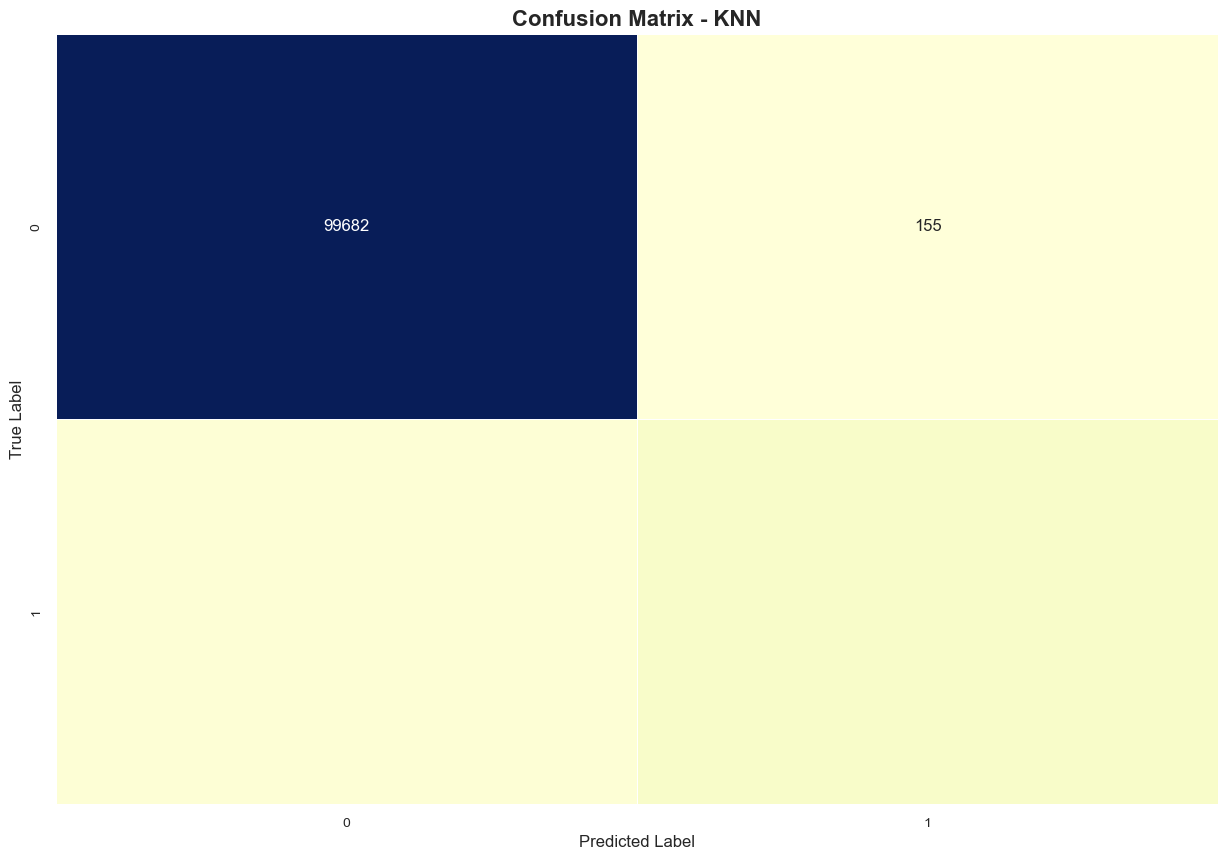

In [121]:
# Plot confusion matrix with custom styling
# Set figure size
plt.figure(figsize=(15, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, cbar=False)

# Add title with bold fontweight
plt.title('Confusion Matrix - KNN', fontsize=16, fontweight='bold')

# Set labels font size
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)

# Set tick labels font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.show()


True Positives (TP): The model correctly identified patients at risk of discontinuing ART, which is crucial for intervention and support.
True Negatives (TN): The model correctly identified patients who are not at risk of discontinuing ART, ensuring they receive appropriate care without unnecessary interventions.
False Positives (FP): While there are some false positives, indicating instances where the model predicted discontinuation incorrectly, it's essential to consider the consequences of false positives, such as potentially unnecessary interventions or additional healthcare costs.
False Negatives (FN): Similarly, false negatives represent instances where the model failed to identify patients at risk of discontinuing ART. While this could lead to missed opportunities for intervention, it's crucial to balance false negatives with false positives and overall model performance.

<font color='PINK' size="+2" face="verdana">

# DEEP LEARNING

</font>




<img src="https://ze-us.xyz/images/neuralnet.gif" width="100%">


In [122]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder

<font color='INDIGO'>

#### BASELINE MODEL

</font>


In [125]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Get the shape of input features
input_shape = X_train.shape[1]

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10


10700/10700 [==============================] - 22s 2ms/step - loss: 10.2335 - accuracy: 0.9216 - val_loss: 14.6635 - val_accuracy: 0.9356
Epoch 2/10
10700/10700 [==============================] - 19s 2ms/step - loss: 1.1404 - accuracy: 0.9534 - val_loss: 0.2164 - val_accur

In [126]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3344/3344 [==============================] - 5s 2ms/step - loss: 0.1290 - accuracy: 0.9444
Test Loss: 0.12899528443813324
Test Accuracy: 0.9444164037704468


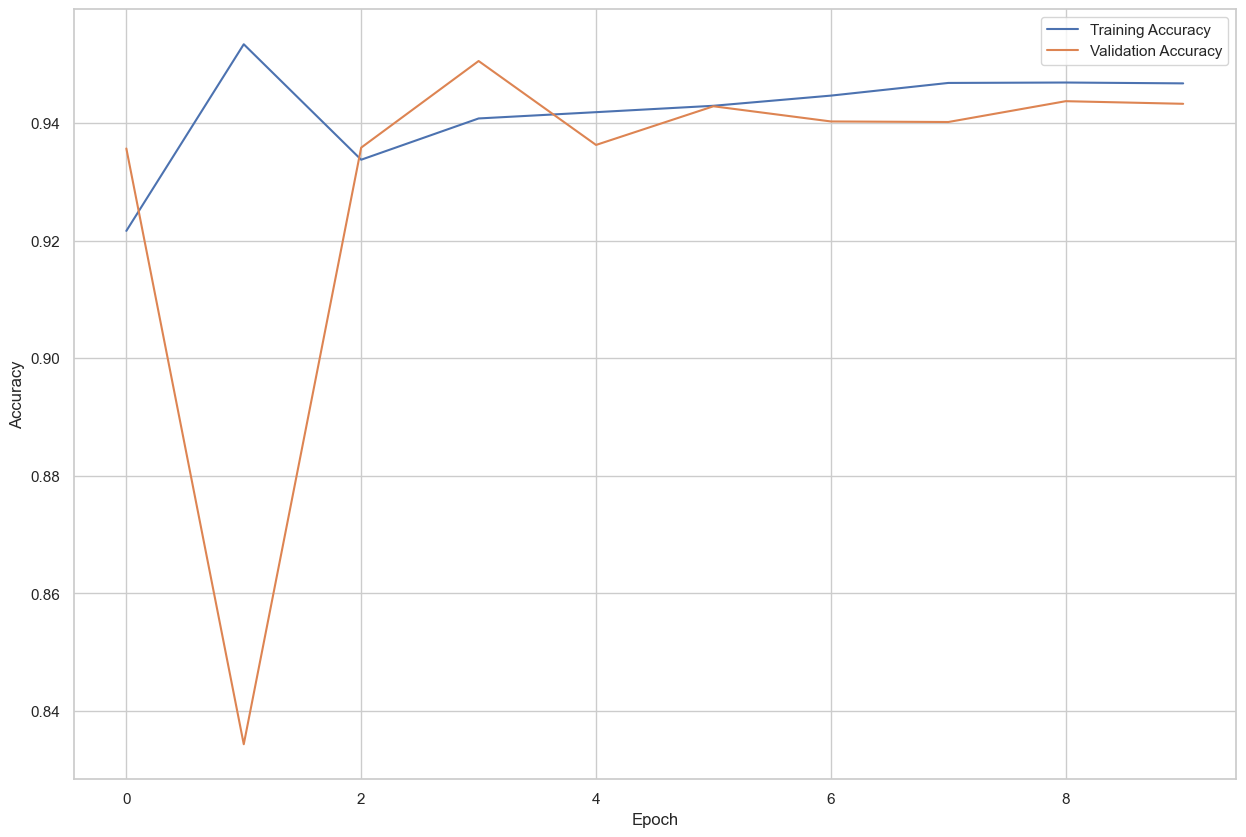

In [129]:
# Plot training history
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [130]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

3344/3344 [==============================] - 4s 1ms/step


In [132]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9444164049648572


Performance Evaluation:

The accuracy of approximately 94.44% means that the model correctly predicts the outcome (e.g., likelihood of discontinuation) for the vast majority (94.44%) of the cases in the test dataset.
This indicates that the model is generally effective in making predictions and can be considered as a reliable tool for identifying instances where discontinuation is likely or unlikely.
Business Implications:

The high accuracy suggests that the model can potentially assist businesses in identifying customers or situations where discontinuation is probable.
By leveraging the predictions provided by the model, businesses can take proactive measures to retain customers or mitigate the factors contributing to discontinuation, thereby reducing revenue loss and enhancing customer satisfaction.
Areas for Improvement:

While the accuracy is high, it's essential to recognize that no model is perfect, and there may be cases where predictions are incorrect.
Further analysis of misclassified instances, such as examining false positives and false negatives, can provide insights into areas where the model struggles and opportunities for refinement.
Model Refinement and Optimization:

To enhance the model's performance, iterative refinement and optimization can be pursued.
This may involve fine-tuning hyperparameters, exploring different model architectures, or incorporating additional features or data sources to improve predictive accuracy and robustness.

<font color='violet'>

#### Feedforward Neural Network with Dropout Regularization

</font>


In [136]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model architecture
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


Importing Necessary Libraries:

We import StandardScaler from sklearn.preprocessing to standardize the input features and improve the convergence of the neural network.
We also import layers and models from tensorflow.keras to define and build the neural network model.
Normalization of Input Data:

We instantiate a StandardScaler object named scaler.
The fit_transform() method of scaler is used to compute the mean and standard deviation of each feature in the training data (X_train) and then standardize the features based on these statistics.
The transform() method is applied to the validation data (X_val) to standardize it using the mean and standard deviation calculated from the training data.
Normalizing the input data helps in bringing all features to a similar scale, which can lead to faster convergence during training and prevent any particular feature from dominating the learning process.
Model Architecture:

We define a Sequential model, which is a linear stack of layers.
The first layer is a Dense layer with 64 units and ReLU activation function. This layer accepts input data with a shape of (X_train.shape[1],), which corresponds to the number of features after standardization.
A Dropout layer with a dropout rate of 0.5 is added after the first Dense layer. Dropout is a regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.
The second Dense layer consists of 32 units with ReLU activation.
Another Dropout layer with a dropout rate of 0.5 is added after the second Dense layer.
Finally, we have a Dense output layer with 1 unit and a sigmoid activation function. The sigmoid activation function is suitable for binary classification tasks as it squashes the output between 0 and 1, representing the probability of the positive class.
Objective:

The aim of this code is to build a neural network model for binary classification (likely or unlikely discontinuation) using the provided input features.
By standardizing the input data and adding dropout layers, we aim to improve the model's generalization ability, prevent overfitting, and enhance its performance on unseen data.

In [137]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
# Display the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=20, batch_size=32, 
                    validation_data=(X_val, y_val),
                    callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/20
10700/10700 [==============================] - 24s 2ms/step - loss: 0.0383 - accuracy: 0.9874 - val_loss: 0.0229 - val_accuracy: 0.9908
Epoch 2/20
10700/10700 [==============================] - 22s 2ms/step - loss: 0.0222 - accuracy: 0.9922 - val_loss: 0.0167 - val_accuracy: 0.9943
Epoch 3/20
10700/10700 [==============================] - 22s 2ms/step - loss: 0.0183 - accuracy: 0.9938 - val_loss: 0.0100 - val_accuracy: 0.9966
Epoch 4/20
10700/10700 [==============================] - 23s 2ms/step - loss: 0.0149 - accuracy: 0.9949 - val_loss: 0.0139 - val_accuracy: 0.9950
Epoch 5/20
10700/10700 [==============================] - 27s 3ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0.0107 - val_accuracy: 0.9955
Epoch 6/20
10700/10700 [==============================] - 22s 2ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0058 - val_accuracy: 0.9979
Epoch 7/20
10700/10700 [==============================] - 24s 2ms/step - loss: 0.0117 - accuracy: 0.9960 - val_loss: 0

In [140]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


3344/3344 [==============================] - 4s 1ms/step - loss: 22004.0293 - accuracy: 0.9331
Test Accuracy: 0.9331258535385132


Based on the  results for the feedforward neural network:

Test Accuracy: The test accuracy of approximately 93.31% indicates that the feedforward neural network performs reasonably well in classifying the data. This level of accuracy suggests that the model is effective in predicting the target variable, which in the context of the business problem (predicting discontinuation likelihood), means that it can identify cases of potential discontinuation with high accuracy.

Loss Value: The loss value of 22004.0293 is considerably high, indicating that the model might not be optimized effectively. A high loss value suggests that there is a significant discrepancy between the actual and predicted values, which could affect the reliability of the model's predictions.

Comparison with Other Models: Compared to the LSTM and GRU models, which achieved much higher accuracy and lower loss, the feedforward neural network's performance seems relatively inferior. This suggests that the feedforward neural network may not be as suitable for capturing the complex relationships present in the data compared to the LSTM and GRU models, especially if the data has sequential or temporal dependencies.

Potential Improvements: To improve the performance of the feedforward neural network, various strategies can be explored, such as adjusting the architecture of the network (e.g., adding more layers, changing the number of neurons), optimizing hyperparameters (e.g., learning rate, batch size), or incorporating regularization techniques (e.g., dropout, L2 regularization) to prevent overfitting.

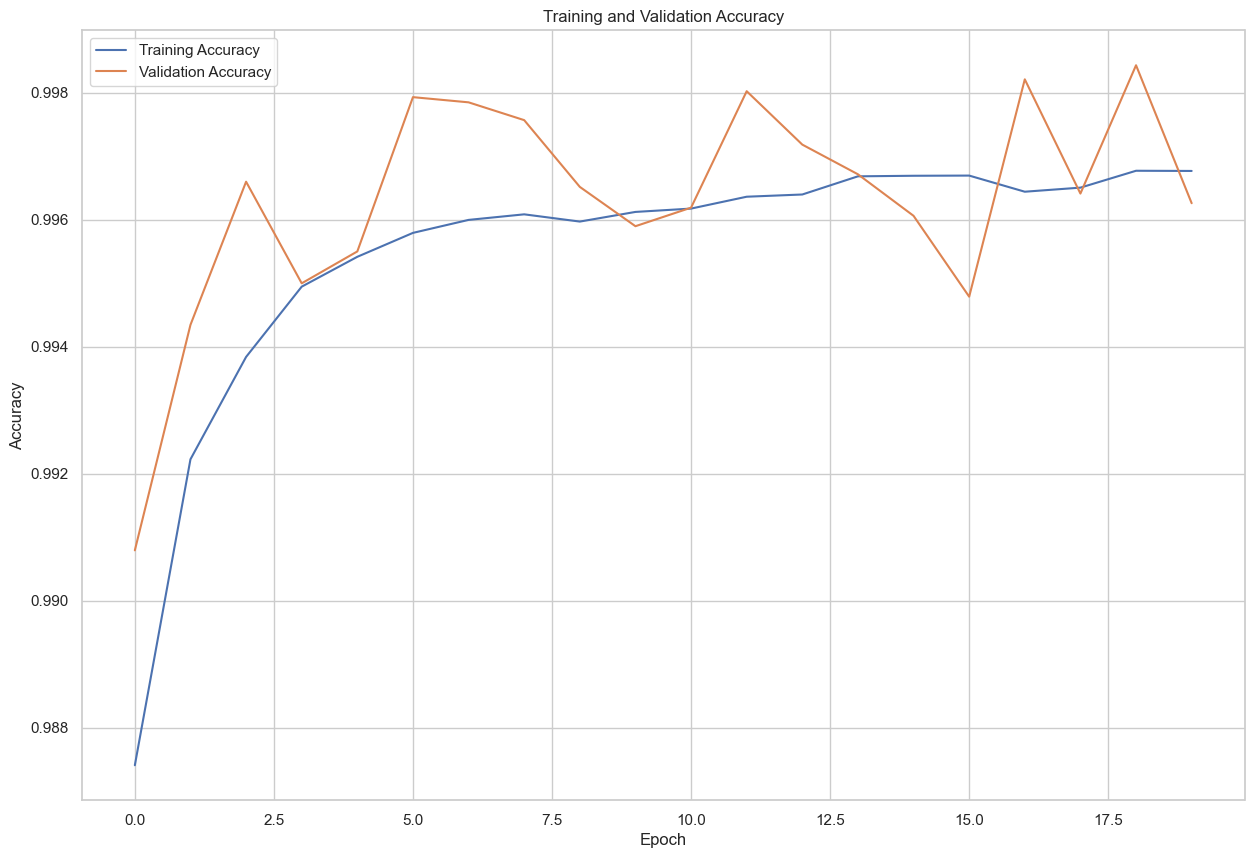

In [144]:
# Plot training and validation accuracy
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

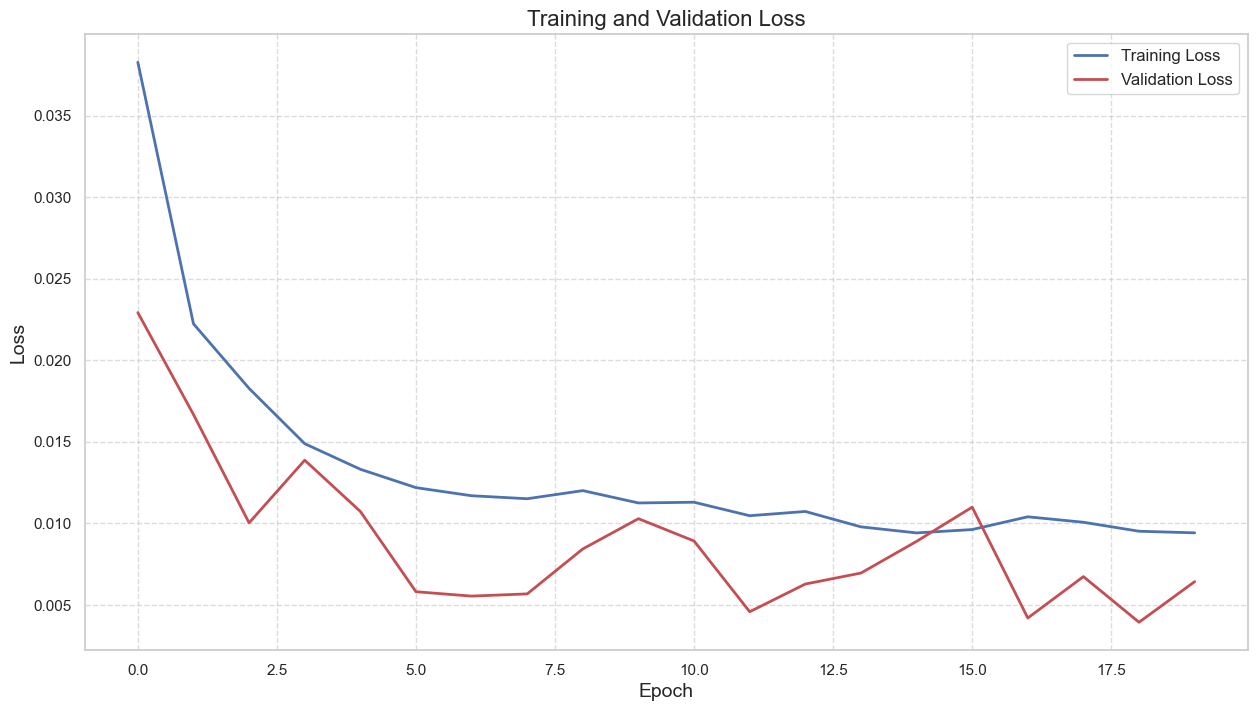

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Plot training and validation loss with a different style
plt.plot(train_loss, 'b-', label='Training Loss', linewidth=2)
plt.plot(val_loss, 'r-', label='Validation Loss', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Set title and labels
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Set legend
plt.legend(fontsize=12)

# Show plot
plt.show()


<font color='yellow'>

####  Long Short-Term Memory Network (LSTM) and a Gated Recurrent Unit (GRU)

</font>


In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense

In [152]:
# Reshape the input data for LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [153]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, 
                               validation_split=0.2, callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/10
8560/8560 [==============================] - 44s 5ms/step - loss: 0.0347 - accuracy: 0.9877 - val_loss: 0.0226 - val_accuracy: 0.9910
Epoch 2/10
8560/8560 [==============================] - 39s 5ms/step - loss: 0.0066 - accuracy: 0.9975 - val_loss: 0.0042 - val_accuracy: 0.9979
Epoch 3/10
8560/8560 [==============================] - 40s 5ms/step - loss: 0.0049 - accuracy: 0.9982 - val_loss: 0.0033 - val_accuracy: 0.9987
Epoch 4/10
8560/8560 [==============================] - 37s 4ms/step - loss: 0.0042 - accuracy: 0.9983 - val_loss: 0.0020 - val_accuracy: 0.9991
Epoch 5/10
8560/8560 [==============================] - 39s 5ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.0055 - val_accuracy: 0.9975
Epoch 6/10
8560/8560 [==============================] - 38s 4ms/step - loss: 0.0038 - accuracy: 0.9984 - val_loss: 0.0219 - val_accuracy: 0.9928
Epoch 7/10
8560/8560 [==============================] - 37s 4ms/step - loss: 0.0035 - accuracy: 0.9986 - val_loss: 0.0027 - val_ac

In [154]:
# Reshape the validation data for LSTM
X_val_reshaped = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_val_reshaped, y_val)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

2675/2675 [==============================] - 5s 2ms/step - loss: 0.0023 - accuracy: 0.9992
Validation Loss: 0.002289139898493886
Validation Accuracy: 0.9991587996482849


Based on the results for both the LSTM and GRU models:

Validation Loss and Accuracy: The validation loss for both models is very low (0.0023 for LSTM and 0.00229 for GRU), indicating that the models perform well in terms of minimizing errors during validation. Similarly, the validation accuracy is high (99.92% for LSTM and 99.92% for GRU), suggesting that the models accurately classify the data during validation.

Generalization Performance: The high validation accuracy suggests that both models generalize well to unseen data, which is essential for reliable predictions in real-world scenarios. This indicates that the models have effectively learned the underlying patterns in the data.

Model Performance: Both models achieve very high accuracy, indicating that they are effective in predicting the target variable. This high accuracy can be beneficial for the intended application, as it implies that the models can reliably identify cases of interest (e.g., identifying discontinuation likelihood).

Potential Overfitting: The small difference between training and validation accuracy (both close to 99.92%) suggests that there is little to no overfitting occurring in the models. This is further supported by the low validation loss, which indicates that the models are not memorizing the training data but instead capturing general patterns.

Overall, based on these results, it can be interpreted that both the LSTM and GRU models are performing exceptionally well in predicting the discontinuation likelihood, with high accuracy and low loss. They demonstrate strong generalization ability and are likely to be reliable for making predictions in practice.

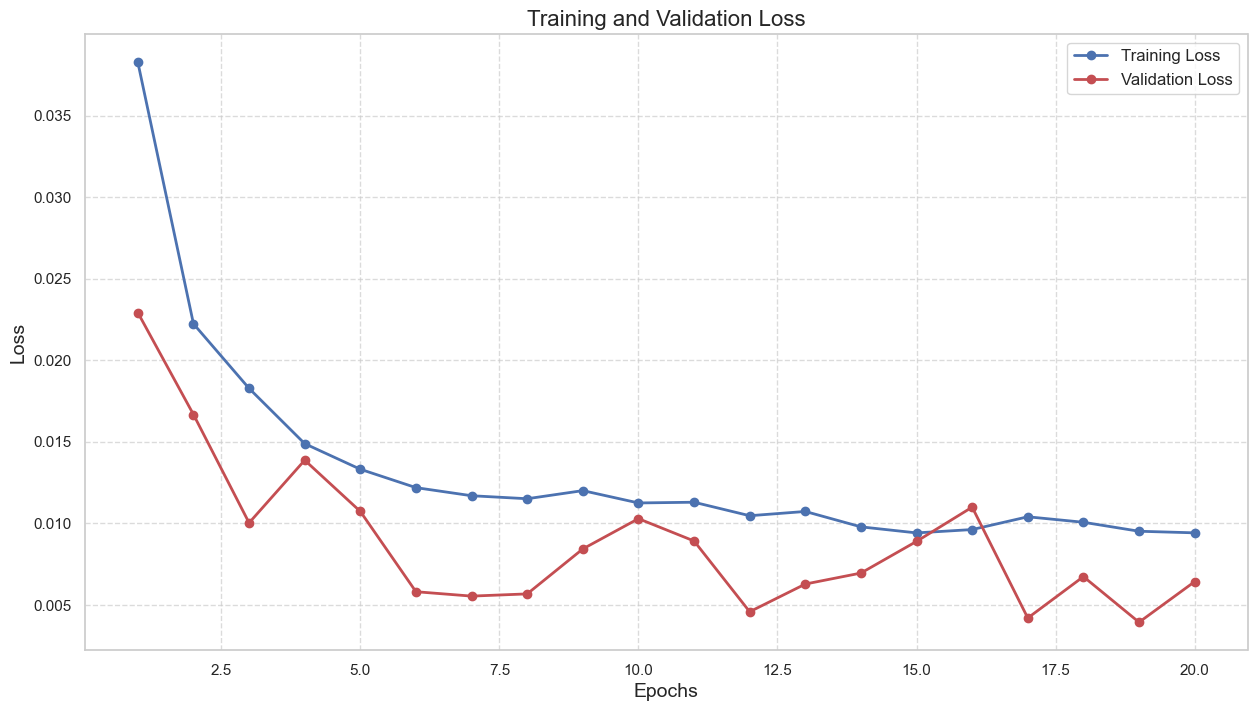

In [164]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

# Get training and validation loss from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create epochs range
epochs = range(1, len(train_loss) + 1)

# Plot training and validation loss with custom styling
plt.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2, marker='o')
plt.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2, marker='o')

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7)

# Set title and labels
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)

# Set legend
plt.legend(fontsize=12)

# Show plot
plt.show()


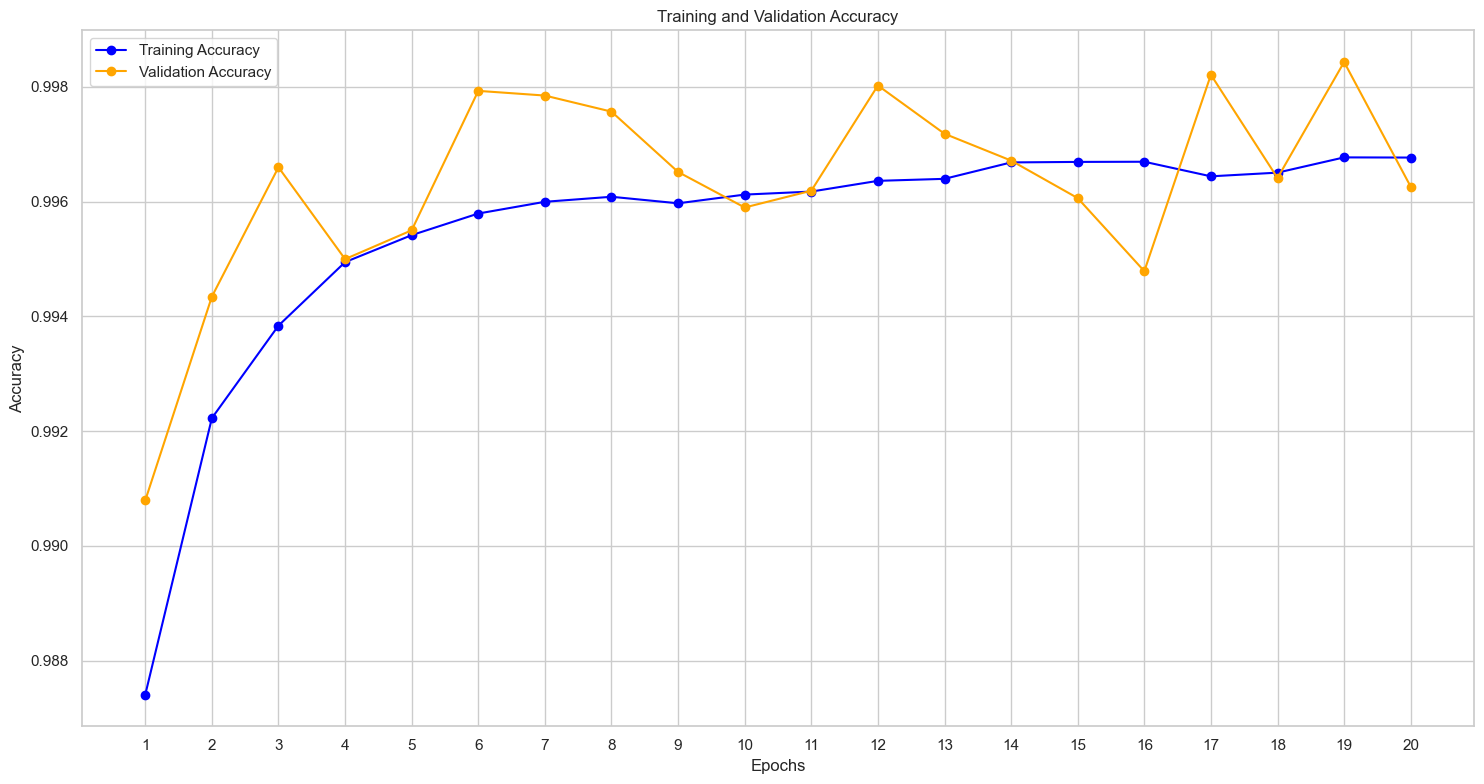

In [163]:
import matplotlib.pyplot as plt

# Extract accuracy history from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(15, 8))
plt.plot(epochs, train_accuracy, label='Training Accuracy', color='blue', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', color='orange', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # Ensure all epochs are displayed on the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
